<div><h1><center>Rapport pour la SAE
 </div> </h1>

<h1>Introduction a la SAÉ</h1>


Cette SAE a pour but de transformer la façon dont on choisit les candidats, en mettant au point un système de classement fondé sur des informations justes et précises. En utilisant des outils comme Python ainsi que les différentes librairies(Pandas,Matplotlib) et l'analyse de données, nous visons à rendre le processus de sélection plus juste et efficace. L'idée est de dépasser les vieilles méthodes pour s'assurer que chaque candidat est évalué équitablement, ouvrant la porte à une sélection plus ouverte et novatrice. Cette démarche vise à moderniser les méthodes de sélection pour qu'elles répondent mieux aux besoins actuels en matière de recrutement.

<h1>Sommaire</h1>

- <a href="#importation-donnees"> Importation des données</a>
-  <a href="#fonctions-utilitaires"> Fonctions Utilitaires</a>
- <a href="#donnees-informatives"> Données Informatives</a>
- <a href="#donnees-graphes"> Représentation graphique des données</a>
- Question de corrélations et leur graphes :
    - <a href="#correlation1">Les genres en fonction des boursiers</a>
    - <a href="#correlation2">Les lycées en fonction des boursiers </a>
    - <a href="#correlation3">Les départements en fonction des boursiers</a>    
- Classement :
    - <a href="#general"> Général</a>
    - <a href="#technologique"> Technologique</a>
    - <a href="#final"> Final</a>

<h2 id="importation-donnees">Importation des données</h2>

Nous allons importer nos 2 bibliothèques utiles pour cette SAE, Matplotlib ainsi que Pandas puis nous allons stocker la DataFrame ParcourSup des Info dans une variable appelé "df".

In [92]:
import pandas as pd 
from math import * 
df = pd.read_excel("INFO_Anonyme.xlsx")

<h2 id="fonctions-utilitaires">Fonctions Utilitaires</h2>


- Voici différentes variables nous permettant de :
    - Renvoyer la dataframe filtrer quand la valeur est présente dans la colonne.
    - Faire une dataframe de tout les candidats dont le voeu est accepté.
    - Calcul des coefficient
    - Moyenne
    - Moyenne des enseignements de spécialité

In [93]:
#fonction qui renvoie la dataframe filtrer quand la valeur est présente dans la colonne

def getdfcolonne(dataf, colonne, valeur):
    return dataf[dataf[colonne] == valeur]


colonne_voeu_confirme = "Vœu confirmé - Libellé"

#dataframe de tout les candidats dont le voeu est accepté

data_voeu_valide = getdfcolonne(df,colonne_voeu_confirme, "Validée")

def est_vide(dataf, tab, etu):
    for indice in tab:
        valeur = dataf[indice].iloc[etu]
        # Vérifier si la valeur est NaN ou si c'est une chaîne vide ou ne contenant que des espaces.
        if pd.isnull(valeur) or (isinstance(valeur, str) and valeur.strip() == ""):
            return True
    return False

def coefficient(note,coef):
    return note*coef

def moyenne(dataf,tab,etu,tab_coef):
    compteur=0
    somme=0.0
    coef_trimestre=0
    for indice in tab :     
        if type(dataf[indice].iloc[etu]) != (str) and dataf[indice].iloc[etu] != -50 :
            somme+=coefficient(dataf[indice].iloc[etu],tab_coef[coef_trimestre])
            compteur+=  tab_coef[coef_trimestre]
   
        coef_trimestre+=1
    if compteur==0 :
        return -1
    return (somme/compteur)

def moyenne_eds(dataf,dico,etu,tab_coef):
    compteur=0
    somme=0.0
    coef_trimestre=0
    for indice in dico.values() :
        
        if not pd.isnull(dataf[indice].iloc[etu] )  :
            if type(dataf[indice].iloc[etu]) != (str):
                print("pour ",indice, " valeur: ", dataf[indice].iloc[etu])
                somme+=coefficient(dataf[indice].iloc[etu],tab_coef[coef_trimestre])
                compteur+=  tab_coef[coef_trimestre]
  
        coef_trimestre+=1
    if compteur==0 :
        return -1
    else:
        return (somme/compteur)


def moyenne_anticipe(dataf, note, etu):
    # Initialise les variables pour le total des notes et le compteur de notes valides
    valeur = 0
    compteur = 0
    
    # Noms des colonnes pour chaque note
    note_grand_oral = "Note de l'épreuve.8"
    note_fr_ecrit = "Note de l'épreuve.9"
    note_fr_oral = "Note de l'épreuve.10"
    
    # Vérifie et ajoute la note du grand oral si elle n'est pas NaN
    if not pd.isnull(dataf[note_grand_oral].iloc[etu]) and dataf[note_grand_oral].iloc[etu] != -2:
        valeur += dataf[note_grand_oral].iloc[etu]
        compteur += 1
    
    # Vérifie et ajoute la note du français écrit si elle n'est pas NaN
    if not pd.isnull(dataf[note_fr_ecrit].iloc[etu]) and dataf[note_fr_ecrit].iloc[etu] != -2:
        valeur += dataf[note_fr_ecrit].iloc[etu]
        compteur += 1
    
    # Vérifie et ajoute la note du français oral si elle n'est pas NaN
    if not pd.isnull(dataf[note_fr_oral].iloc[etu]) and dataf[note_fr_oral].iloc[etu] != -2:
        valeur += dataf[note_fr_oral].iloc[etu]
        compteur += 1
    
    # Calcule la moyenne des notes anticipées si au moins une note est valide
    if compteur > 0:
        moyenne_anticipee = (valeur / compteur) * 0.3 + note * 0.7
        return moyenne_anticipee
    else:
        # Si toutes les notes sont NaN, retourne la note de contrôle continu
        return note

   
def trier_dictionnaire(dico):
    valeurs_triees = sorted(dico.items(), key=lambda x: x[1], reverse=True)
    # Crée un nouveau dictionnaire ordonné à partir des valeurs triées si la moyenne supérieur à 9
    dictionnaire_trie = {k: v for k, v in valeurs_triees if v>9}
    return dictionnaire_trie


<h2 id="donnees-informatives">Données Informatives</h2

In [94]:
annee_scolaire_term="Bulletins - Année Scolaire - Libellé"
annee_scolaire_premiere="Bulletins - Année Scolaire - Libellé.1"

langue_term_A="Langue vivante A scolarité - Libellé 2022/2023"
langue_term_B="Langue vivante B scolarité - Libellé 2022/2023"
langue_premiere_A="Langue vivante A scolarité - Libellé 2021/2022"
langue_premiere_B="Langue vivante B scolarité - Libellé 2021/2022"

option_1="Option facultative 1 Scolarité - Libellé 2022/2023"
option_2="Option facultative 2 Scolarité - Libellé 2022/2023"
option_3="Option facultative 3 Scolarité - Libellé 2022/2023"
option_4="Option facultative 4 Scolarité - Libellé 2022/2023"

math_exp_T1="Moyenne du Candidat en Mathématiques Expertes pour trimestre 1"
math_exp_T2="Moyenne du Candidat en Mathématiques Expertes pour trimestre 2"

<h4>Obtenir les voeux confirmés</h4>

In [95]:
#recupérer le nombre de voeux validées et les quantifier
data_voeu_valide = getdfcolonne(df, colonne_voeu_confirme, "Validée")#pour Slimane
print("Le nombre de candidats ayant des voeux confirmés sont de", len(data_voeu_valide["Vœu confirmé - Libellé"]), "candidats.")

Le nombre de candidats ayant des voeux confirmés sont de 3779 candidats.


<h4>Obtenir une DataFrame des series généraux</h4>

In [96]:
serie_generaux = data_voeu_valide[data_voeu_valide["Groupe candidat - Code"] == 7415] #pour Slimane
data_sg= data_voeu_valide[data_voeu_valide["Groupe candidat - Code"] == 7415] #pour Yannick
print(serie_generaux)

        ID  Groupe candidat - Code Classement  Aménagement      Sexe  \
2        3                    7415         NC          NaN  Masculin   
4        5                    7415         NC          NaN  Masculin   
7        8                    7415          3          NaN  Masculin   
8        9                    7415        220          NaN  Masculin   
9       10                    7415        577          NaN  Masculin   
...    ...                     ...        ...          ...       ...   
4126  4127                    7415         NC          NaN  Masculin   
4127  4128                    7415         NC          NaN  Masculin   
4129  4130                    7415         NC          NaN   Féminin   
4138  4139                    7415         NC          NaN  Masculin   
4140  4141                    7415         NC          NaN  Masculin   

               Candidat boursier - Libellé Année Scolaire - Libellé 2022/2023  \
2                             Non boursier            

<h4>Obtenir une DataFrame des séries technologiques</h4>

In [97]:
serie_technologiques = data_voeu_valide[data_voeu_valide["Groupe candidat - Code"] == 142309]#pour Slimane
data_tech= data_voeu_valide[data_voeu_valide["Groupe candidat - Code"] == 142309]#pour Yannick
print(serie_technologiques)

        ID  Groupe candidat - Code Classement  Aménagement      Sexe  \
0        1                  142309         NC          NaN  Masculin   
3        4                  142309         NC          NaN  Masculin   
5        6                  142309        116          NaN   Féminin   
6        7                  142309        318          NaN  Masculin   
10      11                  142309        336          NaN  Masculin   
...    ...                     ...        ...          ...       ...   
4116  4117                  142309         NC          NaN  Masculin   
4122  4123                  142309         NC          NaN  Masculin   
4128  4129                  142309         NC          NaN  Masculin   
4132  4133                  142309         NC          NaN  Masculin   
4133  4134                  142309         NC          NaN   Féminin   

               Candidat boursier - Libellé Année Scolaire - Libellé 2022/2023  \
0                             Non boursier            

<h3>Série de test pour vérifier et comprendre le document</h3>

on a donc l'anglais qui change de langue vivante A à langue vivante B entre la terminale et la première.
Il y a aussi un changement de cursus(non traité par manque de temps)
Le problème informatique réside dans le fait qu'il s'agit de semestre et non de trimestre

In [98]:
etu=0
#vérifier qu'aucun candidat n'as changé de cursus (exemple de série générale en première à sti2d en terminale)
while etu<len(df.index):
   if df["Série - Code"].iloc[etu] != df["Série - Code.1"].iloc[etu] and not(df["Série - Code.1"].isna().iloc[etu]) and not(df["Série - Code"].isna().iloc[etu]) :
      print("différent cursus entre la première et la terminale pour le candidat numéro : ", etu+1)
   etu+=1

etu=0 
#vérifier s'il y a un changement d'ordre des langues pour certains candidats  
while etu<len(df):
   if df[langue_term_A].iloc[etu]== "Anglais" and df[langue_premiere_B].iloc[etu]== "Anglais" :
      print("changement d'ordre des langues pour le candidat numéro : ", etu+1 )
   if df[langue_term_B].iloc[etu]== "Anglais" and df[langue_premiere_A].iloc[etu]== "Anglais" :
      print("changement d'ordre des langues pour le candidat numéro : ", etu+1 )
   etu+=1
   
etu=0
#vérifier que si l'option math expert est bien confirmé, il y a bien des valeurs
while etu<len(df):
   if df[option_1].iloc[etu]=="Mathématiques Expertes" :
      if pd.isnull(df[math_exp_T1].iloc[etu] ) or pd.isnull(df[math_exp_T2].iloc[etu] ):
         print("problème informatique pour l'étudiant : ", etu)
   elif df[option_2].iloc[etu]=="Mathématiques Expertes" :
      if pd.isnull(df[math_exp_T1].iloc[etu] ) or pd.isnull(df[math_exp_T2].iloc[etu] ):
         print("problème informatique pour l'étudiant : ", etu)
   elif df[option_3].iloc[etu]=="Mathématiques Expertes" :
      if pd.isnull(df[math_exp_T1].iloc[etu] ) or pd.isnull(df[math_exp_T2].iloc[etu] ):
         print("problème informatique pour l'étudiant : ", etu)
   etu+=1

différent cursus entre la première et la terminale pour le candidat numéro :  1379
différent cursus entre la première et la terminale pour le candidat numéro :  1884
différent cursus entre la première et la terminale pour le candidat numéro :  1899
différent cursus entre la première et la terminale pour le candidat numéro :  2718
changement d'ordre des langues pour le candidat numéro :  164
changement d'ordre des langues pour le candidat numéro :  165
changement d'ordre des langues pour le candidat numéro :  471
changement d'ordre des langues pour le candidat numéro :  578
changement d'ordre des langues pour le candidat numéro :  992
changement d'ordre des langues pour le candidat numéro :  1438
changement d'ordre des langues pour le candidat numéro :  1603
changement d'ordre des langues pour le candidat numéro :  1628
changement d'ordre des langues pour le candidat numéro :  2045
changement d'ordre des langues pour le candidat numéro :  2156
changement d'ordre des langues pour le cand

<h4>Répartition des candidats acceptés par rapport a leur série</h4>

In [99]:
#trie les candidats dont le voeu est validée par leurs série de classe en 2022/2023
colonne_voeu_confirme = "Vœu confirmé - Libellé"
data_voeu_valide = getdfcolonne(df, colonne_voeu_confirme, "Validée")
bac_generaux=["Série de classe - Libellé 2022/2023"]
dfbac_generaux=data_voeu_valide[bac_generaux]
print(dfbac_generaux.value_counts())


Série de classe - Libellé 2022/2023                                
Série Générale                                                         1855
Sciences et Technologies de l'Industrie et du Développement Durable     711
Sciences et Technologies du Management et de la Gestion                 191
Professionnelle                                                          58
Formation/Mention complémentaire                                         25
Générale                                                                 11
Scientifique                                                             10
Année préparatoire en Université                                         10
DAEU                                                                      6
Sciences et technologie de laboratoire                                    4
Sciences et technologies de la santé et du social                         4
Economique et social                                                      2
Classe Passerelle po

<h4>Quantifier les voeux acceptés par département</h4>

In [100]:
col_commune = 'Commune Etablissement origine - CodePostal 2022/2023'
data_voeu_valide[col_commune] = data_voeu_valide[col_commune].fillna('').astype(str)
df_comm_93 = data_voeu_valide[data_voeu_valide[col_commune].str.startswith('93')]
df_comm_95 = data_voeu_valide[data_voeu_valide[col_commune].str.startswith('95')]
df_comm_77 = data_voeu_valide[data_voeu_valide[col_commune].str.startswith('77')]
df_comm_78 = data_voeu_valide[data_voeu_valide[col_commune].str.startswith('78')]
df_comm_91 = data_voeu_valide[data_voeu_valide[col_commune].str.startswith('91')]
df_comm_92 = data_voeu_valide[data_voeu_valide[col_commune].str.startswith('92')]
df_comm_94 = data_voeu_valide[data_voeu_valide[col_commune].str.startswith('94')]
Hors_idf = [item for item in data_voeu_valide[col_commune] if not (item.startswith(("75", "77", "78", "91", "92", "93", "94", "95")))]
df_hors_idf = pd.DataFrame({'Data': Hors_idf})

print("Pour le 93, nous avons :", len(df_comm_93[col_commune]), "candidats.")
print("Pour les hors IDF, nous avons :",len(df_hors_idf), "candidats.")
print("Pour le 95, nous avons :", len(df_comm_95[col_commune]), "candidats.")
print("Pour le 92, nous avons :", len(df_comm_92[col_commune]), "candidats.")
print("Pour le 94, nous avons :", len(df_comm_94[col_commune]), "candidats.")
print("Pour le 78, nous avons :", len(df_comm_78[col_commune]), "candidats.")
print("Pour le 77, nous avons :", len(df_comm_77[col_commune]), "candidats.")
print("Pour le 91, nous avons :", len(df_comm_91[col_commune]), "candidats.")


Pour le 93, nous avons : 1032 candidats.
Pour les hors IDF, nous avons : 659 candidats.
Pour le 95, nous avons : 612 candidats.
Pour le 92, nous avons : 327 candidats.
Pour le 94, nous avons : 231 candidats.
Pour le 78, nous avons : 196 candidats.
Pour le 77, nous avons : 182 candidats.
Pour le 91, nous avons : 133 candidats.


C:\Users\Slimane\AppData\Local\Temp\ipykernel_9208\369282464.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_voeu_valide[col_commune] = data_voeu_valide[col_commune].fillna('').astype(str)


<h4>Obtenir le nombre d'hommes et de femmes selon les voeux acceptés</h4>

In [101]:
homme=len([ x for x in data_voeu_valide["Sexe"] if (x == "Masculin") ])
femme=len([ x for x in data_voeu_valide["Sexe"] if (x == "Féminin") ])
print(homme, "hommes et", femme,"femmes.")

3238 hommes et 541 femmes.


<h4>Obtenir le nombre de technologiques et de généraux</h4>

In [102]:
bac_sti2d=getdfcolonne(data_voeu_valide,"Groupe candidat - Code",142309)
bac_general=getdfcolonne(data_voeu_valide,"Groupe candidat - Code",7415)
print("Nous avons",len(bac_sti2d),"bacs technologiques et",len(bac_general),"bacs généraux selon les voeux validés.")

Nous avons 1125 bacs technologiques et 2654 bacs généraux selon les voeux validés.


<h3>Valeurs importantes :</h3>
Nous allons classer chaque nom de colonnes dans des variables, puis nous allons definir des coefficients pour chaque trimestre de premiere ainsi que de terminale, enfin nous allons mettre des coefficient a chaque matiere pour pouvoir calculer plus facilement et de maniere plsu comprehensible nos moyennes pour faire notre classement.


- Colonne Matiere/trimestre 
    - Série généraux primos
    - Série généraux anciens
    - Tables de coefficients
    - Série technologiques 


<h4>Série généraux primos</h4>

In [103]:

#on ne prend pas la prend pas la moyenne du trimestre 3 car non nécessaire pour parcousup (voeux fait en février-mars , le 3ème trimestre est incomplet sauf pour les redoublants)


#les séries générales n'ont pas math, Systemes d''information et numerique, enseignement technologiques

#math spécialité (différent de math )
math_spe_T1="Moyenne du Candidat en Mathématiques Spécialité pour trimestre 1"
math_spe_T2="Moyenne du Candidat en Mathématiques Spécialité pour trimestre 2"
math_spe_T3="Moyenne du Candidat en Mathématiques Spécialité pour trimestre 3"
math_spe_P1="Moyenne du Candidat en Mathématiques Spécialité pour trimestre 1.1"
math_spe_P2="Moyenne du Candidat en Mathématiques Spécialité pour trimestre 2.1"
math_spe_P3="Moyenne du Candidat en Mathématiques Spécialité pour trimestre 3.1"

ensgn_sci_T1="Moyenne du Candidat en Enseignement scientifique pour trimestre 1"
ensgn_sci_T2="Moyenne du Candidat en Enseignement scientifique pour trimestre 2"
ensgn_sci_T3="Moyenne du Candidat en Enseignement scientifique pour trimestre 3"
ensgn_sci_P1="Moyenne du Candidat en Enseignement scientifique pour trimestre 1.1"
ensgn_sci_P2="Moyenne du Candidat en Enseignement scientifique pour trimestre 2.1"
ensgn_sci_P3="Moyenne du Candidat en Enseignement scientifique pour trimestre 3.1"


#pas de matière de français en terminale
français_P1="Moyenne du Candidat en Français pour trimestre 1.1"
français_P2="Moyenne du Candidat en Français pour trimestre 2.1" 
français_P3="Moyenne du Candidat en Français pour trimestre 3.1"


#langue vivante A
langue_A_T1="Moyenne du Candidat en Langue vivante A pour trimestre 1" 
langue_A_T2="Moyenne du Candidat en Langue vivante A pour trimestre 2" 
langue_A_T3="Moyenne du Candidat en Langue vivante A pour trimestre 3"
langue_A_P1="Moyenne du Candidat en Langue vivante A pour trimestre 1.1" 
langue_A_P2="Moyenne du Candidat en Langue vivante A pour trimestre 2.1" 
langue_A_P3="Moyenne du Candidat en Langue vivante A pour trimestre 3.1" 


#langue vivante B
langue_B_T1="Moyenne du Candidat en Langue vivante B pour trimestre 1" 
langue_B_T2="Moyenne du Candidat en Langue vivante B pour trimestre 2"
langue_B_T3="Moyenne du Candidat en Langue vivante B pour trimestre 3" 
langue_B_P1="Moyenne du Candidat en Langue vivante B pour trimestre 1.1" 
langue_B_P2="Moyenne du Candidat en Langue vivante B pour trimestre 2.1" 
langue_B_P3="Moyenne du Candidat en Langue vivante B pour trimestre 3.1"

#matière scientique (enseignement scientifique )

numerique_T1="Moyenne du Candidat en Numérique et Sciences Informatiques pour trimestre 1"
numerique_T2="Moyenne du Candidat en Numérique et Sciences Informatiques pour trimestre 2"
numerique_T3="Moyenne du Candidat en Numérique et Sciences Informatiques pour trimestre 3"
numerique_P1="Moyenne du Candidat en Numérique et Sciences Informatiques pour trimestre 1.1"
numerique_P2="Moyenne du Candidat en Numérique et Sciences Informatiques pour trimestre 2.1"
numerique_P3="Moyenne du Candidat en Numérique et Sciences Informatiques pour trimestre 3.1"

sci_ing_T1="Moyenne du Candidat en Sciences de l'ingénieur pour trimestre 1"
sci_ing_T2="Moyenne du Candidat en Sciences de l'ingénieur pour trimestre 2"
sci_ing_T3="Moyenne du Candidat en Sciences de l'ingénieur pour trimestre 3"
sci_ing_P1="Moyenne du Candidat en Sciences de l'ingénieur pour trimestre 1.1"
sci_ing_P2="Moyenne du Candidat en Sciences de l'ingénieur pour trimestre 2.1"
sci_ing_P3="Moyenne du Candidat en Sciences de l'ingénieur pour trimestre 3.1"


#facultatif en terminal (poser un if pour vérifier si le candidat à choisi ces matières)
math_comp_T1="Moyenne du Candidat en Mathématiques Complémentaires pour trimestre 1"
math_comp_T2="Moyenne du Candidat en Mathématiques Complémentaires pour trimestre 2"
math_comp_T3="Moyenne du Candidat en Mathématiques Complémentaires pour trimestre 2"
#pas de math complémentaire en première

math_exp_T1="Moyenne du Candidat en Mathématiques Expertes pour trimestre 1"
math_exp_T2="Moyenne du Candidat en Mathématiques Expertes pour trimestre 2"
math_exp_T3="Moyenne du Candidat en Mathématiques Expertes pour trimestre 3"
#pas de math expert en première

#tableau nécessaire poure les non-redoublants
tab_math_spe=[math_spe_T1, math_spe_T2, math_spe_P1, math_spe_P2, math_spe_P3]
tab_ensgn_sci=[ensgn_sci_T1, ensgn_sci_T2, ensgn_sci_P1, ensgn_sci_P2, ensgn_sci_P3,]
tab_français=[français_P1, français_P2, français_P3]
tab_langueA=[ langue_A_T1, langue_A_T2, langue_A_P1, langue_A_P2, langue_A_P3,]
tab_langueB=[langue_B_T1, langue_B_T2, langue_B_P1, langue_B_P2, langue_B_P3]
tab_num=[ numerique_T1, numerique_T2, numerique_P1, numerique_P2, numerique_P3]
tab_sci_ing=[sci_ing_T1, sci_ing_T2, sci_ing_P1, sci_ing_P2, sci_ing_P3]
tab_math_comp=[ math_comp_T1, math_comp_T2]
tab_math_exp=[math_exp_T1, math_exp_T2]

tab_matiere_sg_A=[ tab_ensgn_sci, tab_français, tab_num, tab_langueA  ]
tab_matiere_sg_B=[ tab_ensgn_sci, tab_français, tab_num, tab_langueB  ]

#tableau nécessaire pour les redoublants (prise en compte du troisième trimestre)
tab_math_spe_rdb=[math_spe_T1, math_spe_T2, math_spe_T3, math_spe_P1, math_spe_P2, math_spe_P3]
tab_ensgn_sci_rdb=[ensgn_sci_T1, ensgn_sci_T2, ensgn_sci_T3, ensgn_sci_P1, ensgn_sci_P2, ensgn_sci_P3,]
tab_français_rdb=[français_P1, français_P2, français_P3]
tab_langueA_rdb=[ langue_A_T1, langue_A_T2, langue_A_T3, langue_A_P1, langue_A_P2, langue_A_P3,]
tab_langueB_rdb=[langue_B_T1, langue_B_T2, langue_B_T3, langue_B_P1, langue_B_P2, langue_B_P3]
tab_num_rdb=[ numerique_T1, numerique_T2,numerique_T3, numerique_P1, numerique_P2, numerique_P3]
tab_sci_ing_rdb=[sci_ing_T1, sci_ing_T2,sci_ing_T3, sci_ing_P1, sci_ing_P2, sci_ing_P3]
tab_math_comp_rdb=[ math_comp_T1, math_comp_T2, math_comp_T3]
tab_math_exp_rdb=[math_exp_T1, math_exp_T2, math_exp_T3]

tab_matiere_sg_A_rdb=[ tab_ensgn_sci, tab_français, tab_num, tab_langueA  ]
tab_matiere_sg_B_rdb=[ tab_ensgn_sci, tab_français, tab_num, tab_langueB  ]


<h4>Tableau de coefficients</h4>

Tableau des coeffs de série génrale par trimestre

In [104]:
#math spécialité (différent de math )
coef_math_t1=2
coef_math_t2=3
coef_math_t3=4
coef_math_P1=2
coef_math_P2=3
coef_math_p3=4
#math coef (non-redoublants)
math_coef=[coef_math_t1,coef_math_t2,coef_math_t3,coef_math_P1,coef_math_P2,coef_math_p3]
#math coef (redoublants)
math_coef_rdb=[coef_math_t1,coef_math_t2,coef_math_t3, coef_math_t3,coef_math_P1,coef_math_P2,coef_math_p3]

#math experts
coef_math_exp_t1=2
coef_math_exp_t2=3
coef_math_exp_t3=4
#math experts coef
math_exp_coef=[coef_math_exp_t1,coef_math_exp_t2]
#math experts coef (redoublants)
math_exp_coef_rdb=[coef_math_exp_t1,coef_math_exp_t2,coef_math_exp_t3]

#math complémantaire
coef_math_comp_t1=1
coef_math_comp_t2=2
coef_math_comp_t3=3
#math complémantaire coef
math_comp_coef=[coef_math_comp_t1,coef_math_comp_t2]
#math complémantaire coef
math_comp_coef_rdb=[coef_math_comp_t1,coef_math_comp_t2,coef_math_comp_t3]

#sciences
coef_sciences_P1=1
coef_sciences_P2=2
coef_sciences_P3=3
coef_sciences_t1=2
coef_sciences_t2=3
coef_sciences_t3=4
#sciences coef
sciences_coef=[coef_sciences_t1,coef_sciences_t2,coef_sciences_P1,coef_sciences_P2,coef_sciences_P3]
#sciences coef (redoublants)
sciences_coef_rdb=[coef_sciences_t1,coef_sciences_t2,coef_sciences_t3,coef_sciences_P1,coef_sciences_P2,coef_sciences_P3]

#nsi
coef_nsi_P1=1
coef_nsi_P2=1
coef_nsi_p3=1
coef_nsi_t1=2
coef_nsi_t2=2
coef_nsi_t3=2
#nsi coef
nsi_coef=[coef_nsi_t1,coef_nsi_t2,coef_nsi_t3,coef_nsi_P1,coef_nsi_P2,coef_nsi_p3]
#nsi coef (redoublants)
nsi_coef_rdb=[coef_nsi_t1,coef_nsi_t2,coef_nsi_P1,coef_nsi_P2,coef_nsi_p3]

#science de l'ingénieur
coef_sci_ing_P1=1
coef_sci_ing_P2=1
coef_sci_ing_P3=1
coef_sci_ing_T1=2
coef_sci_ing_T2=2
coef_sci_ing_T3=2
#science de l'ingénieuur coef
sci_ing_coef=[coef_sci_ing_T1, coef_sci_ing_T2, coef_sci_ing_P1, coef_sci_ing_P2, coef_sci_ing_P3]
#science de l'ingénieuur coef (redoublants)
sci_ing_coef_rdb=[coef_sci_ing_T1, coef_sci_ing_T2, coef_sci_ing_T3, coef_sci_ing_P1, coef_sci_ing_P2, coef_sci_ing_P3]

#anglais
coef_anglais_P1=1
coef_anglais_P2=1
coef_anglais_p3=1
coef_anglais_t1=1
coef_anglais_t2=1
coef_anglais_t3=1
#anglais coef
anglais_coef=[coef_anglais_t1,coef_anglais_t2,coef_anglais_P1,coef_anglais_P2,coef_anglais_p3]
#anglais coef (redoublants)
anglais_coef_rdb=[coef_anglais_t1,coef_anglais_t2,coef_anglais_t3,coef_anglais_P1,coef_anglais_P2,coef_anglais_p3]

#francais
coef_francais_P1=1
coef_francais_P2=1
coef_francais_p3=1
coef_francais_t1=1
coef_francais_t2=1
coef_francais_t3=1
#francais coef
francais_coef=[coef_francais_P1,coef_francais_P2,coef_francais_p3]


#tableau coef general pour les non-redoublants
tab_coef_general=[sciences_coef,francais_coef,sci_ing_coef, nsi_coef, anglais_coef]
#tableau coef general pour les redoublants
tab_coef_general_rdb=[sciences_coef_rdb,francais_coef,sci_ing_coef_rdb, nsi_coef_rdb, anglais_coef_rdb]



Tableau des coeffs des séries technologiques par trimestre

In [105]:
#Libellé en Mathématiques (différent de math spécialité)
math_coef_T1=4
math_coef_T2=4
math_coef_P1=3
math_coef_P2=3
math_coef_P3=3
tab_math_coef=[math_coef_T1, math_coef_T2, math_coef_P1, math_coef_P2, math_coef_P3]
#redoublant
tab_math_coef_rdb=[math_coef_T1, math_coef_T2, math_coef_P1, math_coef_P2, math_coef_P3]


#nseignements Technologiques Transversaux
coef_ensg_tech_T1=3
coef_ensg_tech_T2=3
coef_ensg_tech_T3=3
coef_ensg_tech_P1=2
coef_ensg_tech_P2=2
coef_ensg_tech_P3=2
tab_coef_ensg=[coef_ensg_tech_T1, coef_ensg_tech_T2, coef_ensg_tech_P1, coef_ensg_tech_P2, coef_ensg_tech_P3]
#redoublant
tab_coef_ensg_rdb=[coef_ensg_tech_T1, coef_ensg_tech_T2, coef_ensg_tech_T3, coef_ensg_tech_P1, coef_ensg_tech_P2, coef_ensg_tech_P3]

#Systemes d''information et numerique
coef_syst_info_T1=4
coef_syst_info_T2=4
coef_syst_info_T3=4
coef_syst_info_P1=3
coef_syst_info_P2=3
coef_syst_info_P3=3
tab_coef_syst_info=[coef_syst_info_T1, coef_syst_info_T2, coef_syst_info_P1, coef_syst_info_P2, coef_syst_info_P3]
#redoublant
tab_coef_syst_info_rdb=[coef_syst_info_T1, coef_syst_info_T2,coef_syst_info_T3, coef_syst_info_P1, coef_syst_info_P2, coef_syst_info_P3]

#tableau coeff technologique 
tab_coef_techno=[francais_coef, tab_coef_syst_info, tab_coef_ensg, anglais_coef]
#tableau coeff technologique (redoublant)
tab_coef_techno_rdb=[francais_coef, tab_coef_syst_info_rdb, tab_coef_ensg_rdb, anglais_coef_rdb]

<h3>Coefficient par Matière</h3>

la nouvelle réforme prend en compte un controle continu et les épreuves du bac pour valider l'année

In [106]:
##dans l'ordre : sciences, français, anglais
matrice_coeff_general=[6,3,4,5,6]

coeff_matiere_math=8
coeff_matiere_math_comp=2
coeff_matiere_math_exp=2

matrice_coeff_techno=[3,7,5,4]

<h4>Matières des Séries Technologiques</h4>

In [107]:
#les bac sti2d n'ont pas math comp, math exp et enseignement scientifique 

#sti2d primo

math_T1="Moyenne du Candidat en Mathématiques pour trimestre 1"
math_T2="Moyenne du Candidat en Mathématiques pour trimestre 2"
math_T3="Moyenne du Candidat en Mathématiques pour trimestre 3"
math_P1="Moyenne du Candidat en Mathématiques pour trimestre 1.1"
math_P2="Moyenne du Candidat en Mathématiques pour trimestre 2.1"
math_P3="Moyenne du Candidat en Mathématiques pour trimestre 3.1"
tab_math=[math_T1, math_T2, math_P1, math_P2, math_P3]
#redoublant
tab_math_rdb=[math_T1, math_T2, math_T3, math_P1, math_P2, math_P3]

#pas de matière de français en terminale

#langue vivante A

#langue vivante B


# bac sti2d anciens ont la matière enseignement technologiques et Systemes d''information et numerique
ensg_tech_trans_T1="Moyenne du Candidat en Enseignements Technologiques Transversaux pour trimestre 1"
ensg_tech_trans_T2="Moyenne du Candidat en Enseignements Technologiques Transversaux pour trimestre 2"
ensg_tech_trans_T3="Moyenne du Candidat en Enseignements Technologiques Transversaux pour trimestre 3"
ensg_tech_trans_P1="Moyenne du Candidat en Enseignements Technologiques Transversaux pour trimestre 1.1"
ensg_tech_trans_P2="Moyenne du Candidat en Enseignements Technologiques Transversaux pour trimestre 2.1"
ensg_tech_trans_P3="Moyenne du Candidat en Enseignements Technologiques Transversaux pour trimestre 3.1"

tab_ensg_tec_trans=[ensg_tech_trans_T1, ensg_tech_trans_T2, ensg_tech_trans_P1, ensg_tech_trans_P2, ensg_tech_trans_P3 ]
tab_ensg_tec_trans_rdb=[ensg_tech_trans_T1, ensg_tech_trans_T2, ensg_tech_trans_P1, ensg_tech_trans_P2, ensg_tech_trans_P3 ]

syst_info_T1="Moyenne du Candidat en Systemes d''information et numerique pour trimestre 1"
syst_info_T2="Moyenne du Candidat en Systemes d''information et numerique pour trimestre 2"
syst_info_T3="Moyenne du Candidat en Systemes d''information et numerique pour trimestre 3"
syst_info_P1="Moyenne du Candidat en Systemes d''information et numerique pour trimestre 1.1"
syst_info_P2="Moyenne du Candidat en Systemes d''information et numerique pour trimestre 2.1"
syst_info_P3="Moyenne du Candidat en Systemes d''information et numerique pour trimestre 3.1"
tab_syst_info=[syst_info_T1, syst_info_T2,syst_info_P1,syst_info_P2, syst_info_P3]
#redoublant
tab_syst_info_rdb=[syst_info_T1, syst_info_T2, syst_info_T3, syst_info_P1,syst_info_P2, syst_info_P3]

# table des mmatières
tab_matiere_techno_A=[tab_français, tab_syst_info, tab_ensg_tec_trans, tab_langueA]
tab_matiere_techno_B=[tab_français, tab_syst_info, tab_ensg_tec_trans, tab_langueB]
# table des mmatières (redoublant)
tab_matiere_techno_A_rdb=[tab_français, tab_syst_info_rdb, tab_ensg_tec_trans_rdb, tab_langueA_rdb]
tab_matiere_techno_B_rdb=[tab_français, tab_syst_info_rdb, tab_ensg_tec_trans_rdb, tab_langueB_rdb]


<h4>Calcul Moyenne série général</h4>

In [127]:
dico_moyennes={}
etudiant=0
data_sg.fillna(-2, inplace=True)
while etudiant < len(data_sg):
    tab_de_matiere=0
    avg=0
    compteur=0


      
    #différencier les  redoublant 
    if( data_sg[annee_scolaire_term].iloc[etudiant]=="2022-2023" and data_sg[annee_scolaire_premiere].iloc[etudiant]=="2021-2022" ):
        #différencier quelle langue est en "langue vivante A" (anglais/espagnol/allemend/chinois..)

        #vérifier s'il y a eu un changement changment de "langue vivante A" (exemple: en première l'anglais est en langue vivante B puis elle devient langue vivante A en terminale)
        if( data_sg[langue_term_A].iloc[etudiant]== "Anglais" and data_sg[langue_premiere_B].iloc[etudiant]== "Anglais" ):
            while tab_de_matiere < len(tab_matiere_sg_A)-2:
                case_remplie=not( est_vide(data_sg, tab_matiere_sg_A[tab_de_matiere],etudiant) )
        
                if case_remplie:
                    valeur_moyenne=moyenne(data_sg, tab_matiere_sg_A[tab_de_matiere],etudiant,tab_coef_general[tab_de_matiere])
                    if valeur_moyenne != -1:
                        avg+=coefficient(valeur_moyenne,matrice_coeff_general[tab_de_matiere])
                        compteur+=matrice_coeff_general[tab_de_matiere]
                tab_de_matiere+=1

            valeur_moyenne=moyenne(data_sg, tab_matiere_sg_B[tab_de_matiere],etudiant,tab_coef_general[tab_de_matiere])        
            avg+=coefficient(valeur_moyenne,matrice_coeff_general[tab_de_matiere])
            compteur+=matrice_coeff_general[tab_de_matiere]
            tab_de_matiere+=1

            case_remplie= not( est_vide(data_sg, tab_matiere_sg_B[tab_de_matiere],etudiant) )       
            #vérifier si l'étudiant a  math spécialité ou l'option math complémentaire
            if not ( est_vide( data_sg, tab_math_spe, etudiant) ) :

                valeur_moyenne=moyenne(data_sg, tab_math_spe,etudiant,math_coef)
                avg+=coefficient(valeur_moyenne, coeff_matiere_math)
                compteur+=coeff_matiere_math
                if data_sg[option_1].iloc[etudiant]=="Mathématiques Expertes" or data_sg[option_2].iloc[etudiant]=="Mathématiques Expertes" or data_sg[option_3].iloc[etudiant]=="Mathématiques Expertes" :
                    if est_vide(data_sg,tab_math_exp,etudiant):
                        avg+=coefficient(moyenne(data_sg,tab_math_exp,etudiant,math_exp_coef), coeff_matiere_math_exp )
                        compteur+=coeff_matiere_math_exp
                moyenne_continu=avg/compteur
                note=moyenne_anticipe(data_sg, moyenne_continu, etudiant)
                dico_moyennes[data_sg["ID"].iloc[etudiant]] = note
            elif data_sg[option_1].iloc[etudiant]=="Mathématiques Complémentaires" or data_sg[option_2].iloc[etudiant]=="Mathématiques Complémentaires" or data_sg[option_3].iloc[etudiant]=="Mathématiques Complémentaires" :
                if est_vide(data_sg,tab_math_comp,etudiant):
                    avg+=coefficient(moyenne(data_sg, tab_math_comp, etudiant, math_comp_coef), coeff_matiere_math_comp )
                    compteur+=coeff_matiere_math_comp
                moyenne_continu=avg/compteur
                note=moyenne_anticipe(data_sg, moyenne_continu, etudiant)
                dico_moyennes[data_sg["ID"].iloc[etudiant]] = note
            else:
                dico_moyennes[data_sg["ID"].iloc[etudiant]] = -1
                                  
        elif ( data_sg[langue_term_B].iloc[etudiant]== "Anglais" and data_sg[langue_premiere_A].iloc[etudiant]== "Anglais" ):
            while tab_de_matiere < len(tab_matiere_sg_A)-2:
                case_remplie=not( est_vide(data_sg, tab_matiere_sg_A[tab_de_matiere],etudiant) )

                if case_remplie:
                    valeur_moyenne=moyenne(data_sg, tab_matiere_sg_A[tab_de_matiere],etudiant,tab_coef_general[tab_de_matiere])
                    if valeur_moyenne != -1:
                        avg+=coefficient(valeur_moyenne,matrice_coeff_general[tab_de_matiere])
                        compteur+=matrice_coeff_general[tab_de_matiere]
                tab_de_matiere+=1

            valeur_moyenne=moyenne(data_sg, tab_matiere_sg_B[tab_de_matiere],etudiant,tab_coef_general[tab_de_matiere])        
            avg+=coefficient(valeur_moyenne,matrice_coeff_general[tab_de_matiere])
            compteur+=matrice_coeff_general[tab_de_matiere]
            tab_de_matiere+=1

            case_remplie= not( est_vide(data_sg, tab_matiere_sg_B[tab_de_matiere],etudiant) )
            #vérifier si l'étudiant a  math spécialité ou l'option math complémentaire
            if not ( est_vide( data_sg, tab_math_spe, etudiant) ) :

                valeur_moyenne=moyenne(data_sg, tab_math_spe,etudiant,math_coef)
                avg+=coefficient(valeur_moyenne, coeff_matiere_math)
                compteur+=coeff_matiere_math
                if data_sg[option_1].iloc[etudiant]=="Mathématiques Expertes" or data_sg[option_2].iloc[etudiant]=="Mathématiques Expertes" or data_sg[option_3].iloc[etudiant]=="Mathématiques Expertes" :
                    if est_vide(data_sg,tab_math_exp,etudiant):
                        avg+=coefficient(moyenne(data_sg,tab_math_exp,etudiant,math_exp_coef), coeff_matiere_math_exp )
                        compteur+=coeff_matiere_math_exp
                moyenne_continu=avg/compteur
                note=moyenne_anticipe(data_sg, moyenne_continu, etudiant)
                dico_moyennes[data_sg["ID"].iloc[etudiant]] = note
            elif data_sg[option_1].iloc[etudiant]=="Mathématiques Complémentaires" or data_sg[option_2].iloc[etudiant]=="Mathématiques Complémentaires" or data_sg[option_3].iloc[etudiant]=="Mathématiques Complémentaires" :
                if est_vide(data_sg,tab_math_comp,etudiant):
                    avg+=coefficient(moyenne(data_sg, tab_math_comp, etudiant, math_comp_coef), coeff_matiere_math_comp )
                    compteur+=coeff_matiere_math_comp
                moyenne_continu=avg/compteur
                note=moyenne_anticipe(data_sg, moyenne_continu, etudiant)
                dico_moyennes[data_sg["ID"].iloc[etudiant]] = note
            else:
                dico_moyennes[data_sg["ID"].iloc[etudiant]] = -1

        elif ( data_sg[langue_term_A].iloc[etudiant]== "Anglais" and data_sg[langue_premiere_A].iloc[etudiant]== "Anglais" ):
            while tab_de_matiere < len(tab_matiere_sg_A):
                
                case_remplie=not( est_vide(data_sg, tab_matiere_sg_A[tab_de_matiere],etudiant) )
                
                if case_remplie:
                    valeur_moyenne=moyenne(data_sg, tab_matiere_sg_A[tab_de_matiere],etudiant,tab_coef_general[tab_de_matiere])
                    if valeur_moyenne != -1:
                        avg+=coefficient(valeur_moyenne,matrice_coeff_general[tab_de_matiere])
                        compteur+=matrice_coeff_general[tab_de_matiere]
                tab_de_matiere+=1

            #vérifier si l'étudiant a  math spécialité ou l'option math complémentaire
            if not ( est_vide( data_sg, tab_math_spe, etudiant) ) :

                valeur_moyenne=moyenne(data_sg, tab_math_spe,etudiant,math_coef)
                avg+=coefficient(valeur_moyenne, coeff_matiere_math)
                compteur+=coeff_matiere_math
                if data_sg[option_1].iloc[etudiant]=="Mathématiques Expertes" or data_sg[option_2].iloc[etudiant]=="Mathématiques Expertes" or data_sg[option_3].iloc[etudiant]=="Mathématiques Expertes" :
                    if est_vide(data_sg,tab_math_exp,etudiant):
                        avg+=coefficient(moyenne(data_sg,tab_math_exp,etudiant,math_exp_coef), coeff_matiere_math_exp )
                        compteur+=coeff_matiere_math_exp
                    
                moyenne_continu=avg/compteur
                note=moyenne_anticipe(data_sg, moyenne_continu, etudiant)
                dico_moyennes[data_sg["ID"].iloc[etudiant]] = note
            elif data_sg[option_1].iloc[etudiant]=="Mathématiques Complémentaires" or data_sg[option_2].iloc[etudiant]=="Mathématiques Complémentaires" or data_sg[option_3].iloc[etudiant]=="Mathématiques Complémentaires" :
                if est_vide(data_sg,tab_math_comp,etudiant):
                    avg+=coefficient(moyenne(data_sg, tab_math_comp, etudiant, math_comp_coef), coeff_matiere_math_comp )
                    compteur+=coeff_matiere_math_comp
                moyenne_continu=avg/compteur
                note=moyenne_anticipe(data_sg, moyenne_continu, etudiant)
                dico_moyennes[data_sg["ID"].iloc[etudiant]] = note
            else:
                dico_moyennes[data_sg["ID"].iloc[etudiant]] = -1
        
        elif ( data_sg[langue_term_B].iloc[etudiant]== "Anglais" and data_sg[langue_premiere_B].iloc[etudiant]== "Anglais" ):
            while tab_de_matiere < len(tab_matiere_sg_B):
                case_remplie=not( est_vide(data_sg, tab_matiere_sg_B[tab_de_matiere],etudiant) )

                if case_remplie:
                    valeur_moyenne=moyenne(data_sg, tab_matiere_sg_B[tab_de_matiere],etudiant,tab_coef_general[tab_de_matiere])
                    if valeur_moyenne != -1:
                        avg+=coefficient(valeur_moyenne,matrice_coeff_general[tab_de_matiere])
                        compteur+=matrice_coeff_general[tab_de_matiere]
                tab_de_matiere+=1

            #vérifier si l'étudiant a  math spécialité ou l'option math complémentaire
            if not ( est_vide( data_sg, tab_math_spe, etudiant) ) :

                valeur_moyenne=moyenne(data_sg, tab_math_spe,etudiant,math_coef)
                avg+=coefficient(valeur_moyenne, coeff_matiere_math)
                compteur+=coeff_matiere_math
                if data_sg[option_1].iloc[etudiant]=="Mathématiques Expertes" or data_sg[option_2].iloc[etudiant]=="Mathématiques Expertes" or data_sg[option_3].iloc[etudiant]=="Mathématiques Expertes" :
                    if est_vide(data_sg,tab_math_exp,etudiant):
                        avg+=coefficient(moyenne(data_sg,tab_math_exp,etudiant,math_exp_coef), coeff_matiere_math_exp )
                        compteur+=coeff_matiere_math_exp
                note=moyenne_anticipe(data_sg, avg/compteur, etudiant)
                dico_moyennes[data_sg["ID"].iloc[etudiant]] = note
            elif data_sg[option_1].iloc[etudiant]=="Mathématiques Complémentaires" or data_sg[option_2].iloc[etudiant]=="Mathématiques Complémentaires" or data_sg[option_3].iloc[etudiant]=="Mathématiques Complémentaires" :
                if est_vide(data_sg,tab_math_comp,etudiant):
                    avg+=coefficient(moyenne(data_sg, tab_math_comp, etudiant, math_comp_coef), coeff_matiere_math_comp )
                    compteur+=coeff_matiere_math_comp
                moyenne_continu=avg/compteur
                note=moyenne_anticipe(data_sg, moyenne_continu, etudiant)
                dico_moyennes[data_sg["ID"].iloc[etudiant]] = note
            else:
                dico_moyennes[data_sg["ID"].iloc[etudiant]] = -1
                        
        else:
            dico_moyennes[data_sg["ID"].iloc[etudiant]] = -1

    elif not ( est_vide(data_sg, tab_matiere_sg_B[tab_de_matiere],etudiant) ):
         #différencier quelle langue est en "langue vivante A" (anglais/espagnol/allemend/chinois..)

        #vérifier s'il y a eu un changement changment de "langue vivante A" (exemple: en première l'anglais est en langue vivante B puis elle devient langue vivante A en terminale)
        if( data_sg[langue_term_A].iloc[etudiant]== "Anglais" and data_sg[langue_premiere_B].iloc[etudiant]== "Anglais" ):
            while tab_de_matiere < len(tab_matiere_sg_A_rdb)-2:
                case_remplie=not( est_vide(data_sg, tab_matiere_sg_A_rdb[tab_de_matiere],etudiant) )
        
                if case_remplie:
                    valeur_moyenne=moyenne(data_sg, tab_matiere_sg_A_rdb[tab_de_matiere],etudiant,tab_coef_general_rdb[tab_de_matiere])
                    if valeur_moyenne != -1:
                        avg+=coefficient(valeur_moyenne,matrice_coeff_general[tab_de_matiere])
                        compteur+=matrice_coeff_general[tab_de_matiere]
                tab_de_matiere+=1

            valeur_moyenne=moyenne(data_sg, tab_matiere_sg_B_rdb[tab_de_matiere],etudiant,tab_coef_general_rdb[tab_de_matiere])        
            avg+=coefficient(valeur_moyenne,matrice_coeff_general[tab_de_matiere])
            compteur+=matrice_coeff_general[tab_de_matiere]
            tab_de_matiere+=1

            case_remplie= not( est_vide(data_sg, tab_matiere_sg_B_rdb[tab_de_matiere],etudiant) )       
            #vérifier si l'étudiant a  math spécialité ou l'option math complémentaire
            if not ( est_vide( data_sg, tab_math_spe_rdb, etudiant) ) :

                valeur_moyenne=moyenne(data_sg, tab_math_spe_rdb,etudiant,math_coef_rdb)
                avg+=coefficient(valeur_moyenne, coeff_matiere_math)
                compteur+=coeff_matiere_math
                if data_sg[option_1].iloc[etudiant]=="Mathématiques Expertes" or data_sg[option_2].iloc[etudiant]=="Mathématiques Expertes" or data_sg[option_3].iloc[etudiant]=="Mathématiques Expertes" :
                    if est_vide(data_sg,tab_math_exp,etudiant):
                        avg+=coefficient(moyenne(data_sg,tab_math_exp_rdb,etudiant,math_exp_coef_rdb), coeff_matiere_math_exp )
                        compteur+=coeff_matiere_math_exp
                moyenne_continu=avg/compteur
                note=moyenne_anticipe(data_sg, moyenne_continu, etudiant)
                dico_moyennes[data_sg["ID"].iloc[etudiant]] = note
            elif data_sg[option_1].iloc[etudiant]=="Mathématiques Complémentaires" or data_sg[option_2].iloc[etudiant]=="Mathématiques Complémentaires" or data_sg[option_3].iloc[etudiant]=="Mathématiques Complémentaires" :
                if est_vide(data_sg,tab_math_comp_rdb,etudiant):
                    avg+=coefficient(moyenne(data_sg, tab_math_comp_rdb, etudiant, math_comp_coef), coeff_matiere_math_comp )
                    compteur+=coeff_matiere_math_comp
                moyenne_continu=avg/compteur
                note=moyenne_anticipe(data_sg, moyenne_continu, etudiant)
                dico_moyennes[data_sg["ID"].iloc[etudiant]] = note
            else:
                dico_moyennes[data_sg["ID"].iloc[etudiant]] = -1
                                  
        elif ( data_sg[langue_term_B].iloc[etudiant]== "Anglais" and data_sg[langue_premiere_A].iloc[etudiant]== "Anglais" ):
            while tab_de_matiere < len(tab_matiere_sg_B_rdb)-2:
                case_remplie=not( est_vide(data_sg, tab_matiere_sg_B_rdb[tab_de_matiere],etudiant) )
        
                if case_remplie:
                    valeur_moyenne=moyenne(data_sg, tab_matiere_sg_B_rdb[tab_de_matiere],etudiant,tab_coef_general_rdb[tab_de_matiere])
                    if valeur_moyenne != -1:
                        avg+=coefficient(valeur_moyenne,matrice_coeff_general[tab_de_matiere])
                        compteur+=matrice_coeff_general[tab_de_matiere]
                tab_de_matiere+=1

            valeur_moyenne=moyenne(data_sg, tab_matiere_sg_A_rdb[tab_de_matiere],etudiant,tab_coef_general_rdb[tab_de_matiere])        
            avg+=coefficient(valeur_moyenne,matrice_coeff_general[tab_de_matiere])
            compteur+=matrice_coeff_general[tab_de_matiere]
            tab_de_matiere+=1

            case_remplie= not( est_vide(data_sg, tab_matiere_sg_A_rdb[tab_de_matiere],etudiant) )       
            #vérifier si l'étudiant a  math spécialité ou l'option math complémentaire
            if not ( est_vide( data_sg, tab_math_spe_rdb, etudiant) ) :

                valeur_moyenne=moyenne(data_sg, tab_math_spe_rdb,etudiant,math_coef_rdb)
                avg+=coefficient(valeur_moyenne, coeff_matiere_math)
                compteur+=coeff_matiere_math
                if data_sg[option_1].iloc[etudiant]=="Mathématiques Expertes" or data_sg[option_2].iloc[etudiant]=="Mathématiques Expertes" or data_sg[option_3].iloc[etudiant]=="Mathématiques Expertes" :
                    if est_vide(data_sg,tab_math_exp,etudiant):
                        avg+=coefficient(moyenne(data_sg,tab_math_exp_rdb,etudiant,math_exp_coef_rdb), coeff_matiere_math_exp )
                        compteur+=coeff_matiere_math_exp
                moyenne_continu=avg/compteur
                note=moyenne_anticipe(data_sg, moyenne_continu, etudiant)
                dico_moyennes[data_sg["ID"].iloc[etudiant]] = note
            elif data_sg[option_1].iloc[etudiant]=="Mathématiques Complémentaires" or data_sg[option_2].iloc[etudiant]=="Mathématiques Complémentaires" or data_sg[option_3].iloc[etudiant]=="Mathématiques Complémentaires" :
                if est_vide(data_sg,tab_math_comp_rdb,etudiant):
                    avg+=coefficient(moyenne(data_sg, tab_math_comp_rdb, etudiant, math_comp_coef), coeff_matiere_math_comp )
                    compteur+=coeff_matiere_math_comp
                moyenne_continu=avg/compteur
                note=moyenne_anticipe(data_sg, moyenne_continu, etudiant)
                dico_moyennes[data_sg["ID"].iloc[etudiant]] = note
            else:
                dico_moyennes[data_sg["ID"].iloc[etudiant]] = -1

        elif ( data_sg[langue_term_A].iloc[etudiant]== "Anglais" and data_sg[langue_premiere_A].iloc[etudiant]== "Anglais" ):
            while tab_de_matiere < len(tab_matiere_sg_A_rdb):
                
                case_remplie=not( est_vide(data_sg, tab_matiere_sg_A_rdb[tab_de_matiere],etudiant) )
                
                if case_remplie:
                    valeur_moyenne=moyenne(data_sg, tab_matiere_sg_A_rdb[tab_de_matiere],etudiant,tab_coef_general_rdb[tab_de_matiere])
                    if valeur_moyenne != -1:
                        avg+=coefficient(valeur_moyenne,matrice_coeff_general[tab_de_matiere])
                        compteur+=matrice_coeff_general[tab_de_matiere]
                tab_de_matiere+=1

            #vérifier si l'étudiant a  math spécialité ou l'option math complémentaire
            if not ( est_vide( data_sg, tab_math_spe_rdb, etudiant) ) :

                valeur_moyenne=moyenne(data_sg, tab_math_spe_rdb,etudiant,math_coef)
                avg+=coefficient(valeur_moyenne, coeff_matiere_math)
                compteur+=coeff_matiere_math
                if data_sg[option_1].iloc[etudiant]=="Mathématiques Expertes" or data_sg[option_2].iloc[etudiant]=="Mathématiques Expertes" or data_sg[option_3].iloc[etudiant]=="Mathématiques Expertes" :
                    if est_vide(data_sg,tab_math_exp_rdb,etudiant):
                        avg+=coefficient(moyenne(data_sg,tab_math_exp_rdb,etudiant,math_exp_coef_rdb), coeff_matiere_math_exp )
                        compteur+=coeff_matiere_math_exp
                    
                moyenne_continu=avg/compteur
                note=moyenne_anticipe(data_sg, moyenne_continu, etudiant)
                dico_moyennes[data_sg["ID"].iloc[etudiant]] = note
            elif data_sg[option_1].iloc[etudiant]=="Mathématiques Complémentaires" or data_sg[option_2].iloc[etudiant]=="Mathématiques Complémentaires" or data_sg[option_3].iloc[etudiant]=="Mathématiques Complémentaires" :
                if est_vide(data_sg,tab_math_comp_rdb,etudiant):
                    avg+=coefficient(moyenne(data_sg, tab_math_comp_rdb, etudiant, math_comp_coef_rdb), coeff_matiere_math_comp )
                    compteur+=coeff_matiere_math_comp
                moyenne_continu=avg/compteur
                note=moyenne_anticipe(data_sg, moyenne_continu, etudiant)
                dico_moyennes[data_sg["ID"].iloc[etudiant]] = note
            else:
                dico_moyennes[data_sg["ID"].iloc[etudiant]] = -1
        
        elif ( data_sg[langue_term_B].iloc[etudiant]== "Anglais" and data_sg[langue_premiere_B].iloc[etudiant]== "Anglais" ):
            while tab_de_matiere < len(tab_matiere_sg_B_rdb):
                
                case_remplie=not( est_vide(data_sg, tab_matiere_sg_B_rdb[tab_de_matiere],etudiant) )
                
                if case_remplie:
                    valeur_moyenne=moyenne(data_sg, tab_matiere_sg_B_rdb[tab_de_matiere],etudiant,tab_coef_general_rdb[tab_de_matiere])
                    if valeur_moyenne != -1:
                        avg+=coefficient(valeur_moyenne,matrice_coeff_general[tab_de_matiere])
                        compteur+=matrice_coeff_general[tab_de_matiere]
                tab_de_matiere+=1

            #vérifier si l'étudiant a  math spécialité ou l'option math complémentaire
            if not ( est_vide( data_sg, tab_math_spe_rdb, etudiant) ) :

                valeur_moyenne=moyenne(data_sg, tab_math_spe_rdb,etudiant,math_coef)
                avg+=coefficient(valeur_moyenne, coeff_matiere_math)
                compteur+=coeff_matiere_math
                if data_sg[option_1].iloc[etudiant]=="Mathématiques Expertes" or data_sg[option_2].iloc[etudiant]=="Mathématiques Expertes" or data_sg[option_3].iloc[etudiant]=="Mathématiques Expertes" :
                    if est_vide(data_sg,tab_math_exp_rdb,etudiant):
                        avg+=coefficient(moyenne(data_sg,tab_math_exp_rdb,etudiant,math_exp_coef_rdb), coeff_matiere_math_exp )
                        compteur+=coeff_matiere_math_exp
                    
                moyenne_continu=avg/compteur
                note=moyenne_anticipe(data_sg, moyenne_continu, etudiant)
                dico_moyennes[data_sg["ID"].iloc[etudiant]] = note
            elif data_sg[option_1].iloc[etudiant]=="Mathématiques Complémentaires" or data_sg[option_2].iloc[etudiant]=="Mathématiques Complémentaires" or data_sg[option_3].iloc[etudiant]=="Mathématiques Complémentaires" :
                if est_vide(data_sg,tab_math_comp_rdb,etudiant):
                    avg+=coefficient(moyenne(data_sg, tab_math_comp_rdb, etudiant, math_comp_coef_rdb), coeff_matiere_math_comp )
                    compteur+=coeff_matiere_math_comp
                moyenne_continu=avg/compteur
                note=moyenne_anticipe(data_sg, moyenne_continu, etudiant)
                dico_moyennes[data_sg["ID"].iloc[etudiant]] = note
            else:
                dico_moyennes[data_sg["ID"].iloc[etudiant]] = -1
                        
        else:
            dico_moyennes[data_sg["ID"].iloc[etudiant]] = -1
    else :
        dico_moyennes[data_sg["ID"].iloc[etudiant]] = -1
    etudiant+=1

<h4>Calcul Moyenne Série technologique</h4>

In [128]:
dico_moyennes_techno={}
etudiant=0

while etudiant < len(data_tech):
    tab_de_matiere=0
    avg=0
    compteur=0
    vide=0
    matiere_presente=True
   
    #différencier les  redoublant 
    if( data_tech[annee_scolaire_term].iloc[etudiant]=="2022-2023" and data_tech[annee_scolaire_premiere].iloc[etudiant]=="2021-2022" ):
        #différencier quelle langue est en "langue vivante A" (anglais/espagnol/allemend/chinois..)

        #vérifier s'il y a eu un changement changment de "langue vivante A" (exemple: en première l'anglais est en langue vivante B puis elle devient langue vivante A en terminale)
        if( data_tech[langue_term_A].iloc[etudiant]== "Anglais" and data_tech[langue_premiere_B].iloc[etudiant]== "Anglais" ):
            while tab_de_matiere < len(tab_matiere_techno_A)-2:
                case_remplie=not( est_vide(data_tech, tab_matiere_techno_A[tab_de_matiere],etudiant) )
        
                if case_remplie:
                    valeur_moyenne=moyenne(data_tech, tab_matiere_techno_A[tab_de_matiere],etudiant,tab_coef_techno[tab_de_matiere])
                    if valeur_moyenne != -1:
                        avg+=coefficient(valeur_moyenne,matrice_coeff_techno[tab_de_matiere])
                        compteur+=matrice_coeff_general[tab_de_matiere]
                tab_de_matiere+=1

            valeur_moyenne=moyenne(data_tech, tab_matiere_techno_B[tab_de_matiere],etudiant,tab_coef_techno[tab_de_matiere])        
            avg+=coefficient(valeur_moyenne,matrice_coeff_techno[tab_de_matiere])
            compteur+=matrice_coeff_techno[tab_de_matiere]
            tab_de_matiere+=1
            
            # après les moyennes d'anglais il s'agit des moyennes de numériques et sciences info dans le tableau de matière
            if not ( est_vide( data_tech, tab_math, etudiant) ) :
                valeur_moyenne=moyenne(data_tech, tab_math,etudiant,tab_math_coef)
                avg+=coefficient(valeur_moyenne, coeff_matiere_math)
                compteur+=coeff_matiere_math
                moyenne_continu=avg/compteur
                note=moyenne_anticipe(data_tech, moyenne_continu, etudiant)
                dico_moyennes_techno[data_tech["ID"].iloc[etudiant]] = note
            else:
                dico_moyennes[data_tech["ID"].iloc[etudiant]] = -1
                                  
        elif ( data_tech[langue_term_B].iloc[etudiant]== "Anglais" and data_tech[langue_premiere_A].iloc[etudiant]== "Anglais" ):
            while tab_de_matiere < len(tab_matiere_techno_B)-2:
                case_remplie=not( est_vide(data_tech, tab_matiere_techno_B[tab_de_matiere],etudiant) )
        
                if case_remplie:
                    valeur_moyenne=moyenne(data_tech, tab_matiere_techno_B[tab_de_matiere],etudiant,tab_coef_techno[tab_de_matiere])
                    if valeur_moyenne != -1:
                        avg+=coefficient(valeur_moyenne,matrice_coeff_techno[tab_de_matiere])
                        compteur+=matrice_coeff_general[tab_de_matiere]
                tab_de_matiere+=1

            valeur_moyenne=moyenne(data_tech, tab_matiere_techno_A[tab_de_matiere],etudiant,tab_coef_techno[tab_de_matiere])        
            avg+=coefficient(valeur_moyenne,matrice_coeff_techno[tab_de_matiere])
            compteur+=matrice_coeff_techno[tab_de_matiere]
            tab_de_matiere+=1
            # après les moyennes d'anglais il s'agit de vérifier la moyenne de math
        
            if not ( est_vide( data_tech, tab_math, etudiant) ) :
                valeur_moyenne=moyenne(data_tech, tab_math,etudiant,tab_math_coef)
                avg+=coefficient(valeur_moyenne, coeff_matiere_math)
                compteur+=coeff_matiere_math
                moyenne_continu=avg/compteur
                note=moyenne_anticipe(data_tech, moyenne_continu, etudiant)
                dico_moyennes_techno[data_tech["ID"].iloc[etudiant]] = note
            else:
                dico_moyennes_techno[data_tech["ID"].iloc[etudiant]] = -1

        elif ( data_tech[langue_term_A].iloc[etudiant]== "Anglais" and data_tech[langue_premiere_A].iloc[etudiant]== "Anglais" ):
            while tab_de_matiere < len(tab_matiere_techno_A):
                case_remplie=not( est_vide(data_tech, tab_matiere_techno_A[tab_de_matiere],etudiant) )
        
                if case_remplie:
                    valeur_moyenne=moyenne(data_tech, tab_matiere_techno_A[tab_de_matiere],etudiant,tab_coef_techno[tab_de_matiere])
                    if valeur_moyenne != -1:
                        avg+=coefficient(valeur_moyenne,matrice_coeff_techno[tab_de_matiere])
                        compteur+=matrice_coeff_techno[tab_de_matiere]
                tab_de_matiere+=1

            # après les moyennes "obligatoires" il s'agit de vérifier la moyenne de math
        
            if not ( est_vide( data_tech, tab_math, etudiant) ) :
                valeur_moyenne=moyenne(data_tech, tab_math,etudiant,tab_math_coef)
                avg+=coefficient(valeur_moyenne, coeff_matiere_math)
                compteur+=coeff_matiere_math
                moyenne_continu=avg/compteur
                note=moyenne_anticipe(data_tech, moyenne_continu, etudiant)
                dico_moyennes_techno[data_tech["ID"].iloc[etudiant]] = note
            else:
                dico_moyennes_techno[data_tech["ID"].iloc[etudiant]] = -1
        
        elif ( data_tech[langue_term_B].iloc[etudiant]== "Anglais" and data_tech[langue_premiere_B].iloc[etudiant]== "Anglais" ):
            while tab_de_matiere < len(tab_matiere_techno_B):
                case_remplie=not( est_vide(data_tech, tab_matiere_techno_B[tab_de_matiere],etudiant) )
        
                if case_remplie:
                    valeur_moyenne=moyenne(data_tech, tab_matiere_techno_B[tab_de_matiere],etudiant,tab_coef_techno[tab_de_matiere])
                    if valeur_moyenne != -1:
                        avg+=coefficient(valeur_moyenne,matrice_coeff_techno[tab_de_matiere])
                        compteur+=matrice_coeff_general[tab_de_matiere]
                tab_de_matiere+=1

            # après les moyennes "obligatoires" il s'agit de vérifier la moyenne de math
        
            if not ( est_vide( data_tech, tab_math, etudiant) ) :
                valeur_moyenne=moyenne(data_tech, tab_math,etudiant,tab_math_coef)
                avg+=coefficient(valeur_moyenne, coeff_matiere_math)
                compteur+=coeff_matiere_math
                moyenne_continu=avg/compteur
                note=moyenne_anticipe(data_tech, moyenne_continu, etudiant)
                dico_moyennes_techno[data_tech["ID"].iloc[etudiant]] = note
            else:
                dico_moyennes_techno[data_tech["ID"].iloc[etudiant]] = -1
                        
        else:
            dico_moyennes[data_tech["ID"].iloc[etudiant]] = -1

    elif not ( est_vide(data_tech, tab_matiere_sg_B[tab_de_matiere],etudiant) ):
        #différencier quelle langue est en "langue vivante A" (anglais/espagnol/allemend/chinois..)
        #vérifier s'il y a eu un changement changment de "langue vivante A" (exemple: en première l'anglais est en langue vivante B puis elle devient langue vivante A en terminale)
        if( data_tech[langue_term_A].iloc[etudiant]== "Anglais" and data_tech[langue_premiere_B].iloc[etudiant]== "Anglais" ):
            while tab_de_matiere < len(tab_matiere_techno_A_rdb)-2:
                case_remplie=not( est_vide(data_tech, tab_matiere_techno_A_rdb[tab_de_matiere],etudiant) )
        
                if case_remplie:
                    valeur_moyenne=moyenne(data_tech, tab_matiere_techno_A_rdb[tab_de_matiere],etudiant,tab_coef_techno_rdb[tab_de_matiere])
                    if valeur_moyenne != -1:
                        avg+=coefficient(valeur_moyenne,matrice_coeff_techno[tab_de_matiere])
                        compteur+=matrice_coeff_general[tab_de_matiere]
                tab_de_matiere+=1

            valeur_moyenne=moyenne(data_tech, tab_matiere_techno_B_rdb[tab_de_matiere],etudiant,tab_coef_techno_rdb[tab_de_matiere])        
            avg+=coefficient(valeur_moyenne,matrice_coeff_techno[tab_de_matiere])
            compteur+=matrice_coeff_techno[tab_de_matiere]
            tab_de_matiere+=1
            
            # après les moyennes d'anglais il s'agit des moyennes de numériques et sciences info dans le tableau de matière
            if not ( est_vide( data_tech, tab_math_rdb, etudiant) ) :
                valeur_moyenne=moyenne(data_tech, tab_math_rdb,etudiant,tab_math_coef_rdb)
                avg+=coefficient(valeur_moyenne, coeff_matiere_math)
                compteur+=coeff_matiere_math
                moyenne_continu=avg/compteur
                note=moyenne_anticipe(data_tech, moyenne_continu, etudiant)
                dico_moyennes_techno[data_tech["ID"].iloc[etudiant]] = note
            else:
                dico_moyennes_techno[data_tech["ID"].iloc[etudiant]] = -1
                                  
        elif ( data_tech[langue_term_B].iloc[etudiant]== "Anglais" and data_tech[langue_premiere_A].iloc[etudiant]== "Anglais" ):
            while tab_de_matiere < len(tab_matiere_techno_B_rdb)-2:
                case_remplie=not( est_vide(data_tech, tab_matiere_techno_B_rdb[tab_de_matiere],etudiant) )
        
                if case_remplie:
                    valeur_moyenne=moyenne(data_tech, tab_matiere_techno_B_rdb[tab_de_matiere],etudiant,tab_coef_techno_rdb[tab_de_matiere])
                    if valeur_moyenne != -1:
                        avg+=coefficient(valeur_moyenne,matrice_coeff_techno[tab_de_matiere])
                        compteur+=matrice_coeff_general[tab_de_matiere]
                tab_de_matiere+=1

            valeur_moyenne=moyenne(data_tech, tab_matiere_techno_A_rdb[tab_de_matiere],etudiant,tab_coef_techno_rdb[tab_de_matiere])        
            avg+=coefficient(valeur_moyenne,matrice_coeff_techno[tab_de_matiere])
            compteur+=matrice_coeff_techno[tab_de_matiere]
            tab_de_matiere+=1
            # après les moyennes d'anglais il s'agit de vérifier la moyenne de math
        
            if not ( est_vide( data_tech, tab_math_rdb, etudiant) ) :
                valeur_moyenne=moyenne(data_tech, tab_math_rdb,etudiant,tab_math_coef_rdb)
                avg+=coefficient(valeur_moyenne, coeff_matiere_math)
                compteur+=coeff_matiere_math
                moyenne_continu=avg/compteur
                note=moyenne_anticipe(data_tech, moyenne_continu, etudiant)
                dico_moyennes_techno[data_tech["ID"].iloc[etudiant]] = note
            else:
                dico_moyennes_techno[data_tech["ID"].iloc[etudiant]] = -1

        elif ( data_tech[langue_term_A].iloc[etudiant]== "Anglais" and data_tech[langue_premiere_A].iloc[etudiant]== "Anglais" ):
            while tab_de_matiere < len(tab_matiere_techno_A_rdb):
                case_remplie=not( est_vide(data_tech, tab_matiere_techno_A_rdb[tab_de_matiere],etudiant) )
        
                if case_remplie:
                    valeur_moyenne=moyenne(data_tech, tab_matiere_techno_A_rdb[tab_de_matiere],etudiant,tab_coef_techno_rdb[tab_de_matiere])
                    if valeur_moyenne != -1:
                        avg+=coefficient(valeur_moyenne,matrice_coeff_techno[tab_de_matiere])
                        compteur+=matrice_coeff_techno[tab_de_matiere]
                tab_de_matiere+=1

            # après les moyennes "obligatoires" il s'agit de vérifier la moyenne de math
        
            if not ( est_vide( data_tech, tab_math_rdb, etudiant) ) :
                valeur_moyenne=moyenne(data_tech, tab_math_rdb,etudiant,tab_math_coef_rdb)
                avg+=coefficient(valeur_moyenne, coeff_matiere_math)
                compteur+=coeff_matiere_math
                moyenne_continu=avg/compteur
                note=moyenne_anticipe(data_tech, moyenne_continu, etudiant)
                dico_moyennes_techno[data_tech["ID"].iloc[etudiant]] = note
            else:
                dico_moyennes_techno[data_tech["ID"].iloc[etudiant]] = -1
        
        elif ( data_tech[langue_term_B].iloc[etudiant]== "Anglais" and data_tech[langue_premiere_B].iloc[etudiant]== "Anglais" ):
            while tab_de_matiere < len(tab_matiere_techno_B_rdb):
                case_remplie=not( est_vide(data_tech, tab_matiere_techno_B[tab_de_matiere],etudiant) )
        
                if case_remplie:
                    valeur_moyenne=moyenne(data_tech, tab_matiere_techno_B_rdb[tab_de_matiere],etudiant,tab_coef_techno_rdb[tab_de_matiere])
                    if valeur_moyenne != -1:
                        avg+=coefficient(valeur_moyenne,matrice_coeff_techno[tab_de_matiere])
                        compteur+=matrice_coeff_general[tab_de_matiere]
                tab_de_matiere+=1

            # après les moyennes "obligatoires" il s'agit de vérifier la moyenne de math
        
            if not ( est_vide( data_tech, tab_math_rdb, etudiant) ) :
                valeur_moyenne=moyenne(data_tech, tab_math_rdb,etudiant,tab_math_coef_rdb)
                avg+=coefficient(valeur_moyenne, coeff_matiere_math)
                compteur+=coeff_matiere_math
                moyenne_continu=avg/compteur
                note=moyenne_anticipe(data_tech, moyenne_continu, etudiant)
                dico_moyennes_techno[data_tech["ID"].iloc[etudiant]] = note
            else:
                dico_moyennes_techno[data_tech["ID"].iloc[etudiant]] = -1
                        
        else:
            dico_moyennes_techno[data_tech["ID"].iloc[etudiant]] = -1

    else :
        dico_moyennes_techno[data_tech["ID"].iloc[etudiant]] = -1
    etudiant+=1

<h4>Arrange dans l'ordre décroissant, la Moyenne des étudiants dans le dictionnaire</h4>

In [110]:
dico_moyennes=trier_dictionnaire(dico_moyennes)
for cle, valeur in dico_moyennes.items():
    print(f"Clé: {cle}, Valeur: {round(valeur, 2)}")

Clé: 3062, Valeur: 18.45
Clé: 3061, Valeur: 18.07
Clé: 8, Valeur: 17.92
Clé: 2496, Valeur: 17.63
Clé: 2203, Valeur: 17.12
Clé: 2966, Valeur: 17.1
Clé: 1570, Valeur: 16.93
Clé: 2753, Valeur: 16.88
Clé: 609, Valeur: 16.87
Clé: 957, Valeur: 16.81
Clé: 2408, Valeur: 16.81
Clé: 2545, Valeur: 16.77
Clé: 319, Valeur: 16.74
Clé: 1169, Valeur: 16.73
Clé: 1085, Valeur: 16.72
Clé: 301, Valeur: 16.66
Clé: 240, Valeur: 16.57
Clé: 1035, Valeur: 16.56
Clé: 588, Valeur: 16.52
Clé: 2856, Valeur: 16.35
Clé: 2340, Valeur: 16.34
Clé: 2359, Valeur: 16.31
Clé: 2762, Valeur: 16.27
Clé: 1503, Valeur: 16.26
Clé: 31, Valeur: 16.22
Clé: 183, Valeur: 16.21
Clé: 307, Valeur: 16.19
Clé: 726, Valeur: 16.19
Clé: 40, Valeur: 16.18
Clé: 727, Valeur: 16.16
Clé: 2862, Valeur: 16.16
Clé: 2310, Valeur: 16.15
Clé: 2412, Valeur: 16.08
Clé: 299, Valeur: 16.07
Clé: 772, Valeur: 15.92
Clé: 3074, Valeur: 15.91
Clé: 612, Valeur: 15.83
Clé: 2413, Valeur: 15.83
Clé: 3084, Valeur: 15.82
Clé: 1600, Valeur: 15.71
Clé: 2372, Valeur: 15

In [111]:
dico_moyennes_techno=trier_dictionnaire(dico_moyennes_techno)
for cle, valeur in dico_moyennes_techno.items():
    print(f"Clé: {cle}, Valeur: {round(valeur, 2)}")

Clé: 1922, Valeur: 17.57
Clé: 333, Valeur: 17.52
Clé: 2245, Valeur: 17.12
Clé: 2058, Valeur: 16.53
Clé: 161, Valeur: 16.35
Clé: 1010, Valeur: 16.34
Clé: 2066, Valeur: 16.23
Clé: 67, Valeur: 16.2
Clé: 1374, Valeur: 16.08
Clé: 3012, Valeur: 16.01
Clé: 1167, Valeur: 15.84
Clé: 2879, Valeur: 15.69
Clé: 2675, Valeur: 15.68
Clé: 1519, Valeur: 15.67
Clé: 336, Valeur: 15.66
Clé: 1189, Valeur: 15.62
Clé: 460, Valeur: 15.58
Clé: 1396, Valeur: 15.53
Clé: 2061, Valeur: 15.44
Clé: 17, Valeur: 15.42
Clé: 776, Valeur: 15.41
Clé: 522, Valeur: 15.4
Clé: 497, Valeur: 15.34
Clé: 841, Valeur: 15.26
Clé: 475, Valeur: 15.19
Clé: 2693, Valeur: 15.17
Clé: 943, Valeur: 15.11
Clé: 1164, Valeur: 15.09
Clé: 444, Valeur: 15.04
Clé: 465, Valeur: 14.95
Clé: 1910, Valeur: 14.94
Clé: 2275, Valeur: 14.94
Clé: 2773, Valeur: 14.93
Clé: 1168, Valeur: 14.9
Clé: 2832, Valeur: 14.87
Clé: 2985, Valeur: 14.82
Clé: 3011, Valeur: 14.79
Clé: 2236, Valeur: 14.78
Clé: 2827, Valeur: 14.76
Clé: 2878, Valeur: 14.75
Clé: 1317, Valeur: 

<h2 id="donnees-graphes">Représentation graphique des données</h2>

Maintenant que toutes les données ont été chargés et répartis dans différentes variables, nous allons les illustrer sous forme de graphiques pour pouvoir avoir un visuel plus parlant que de simples données et pouvoir faire des corrélations ainsi que des déductions.

<h4>Premiere partie de graphe pour les voeux validés
 : </h4>

- Répartition par sexe
- Répartition par département
- Graphique étranger/ français
- Nombre de candidats par département
- Répartition des Boursiers
- Graphique du niveau d'étude lors de l'inscription
- Graphique des EDS de Terminale
- Graphique des EDS Abandonnés

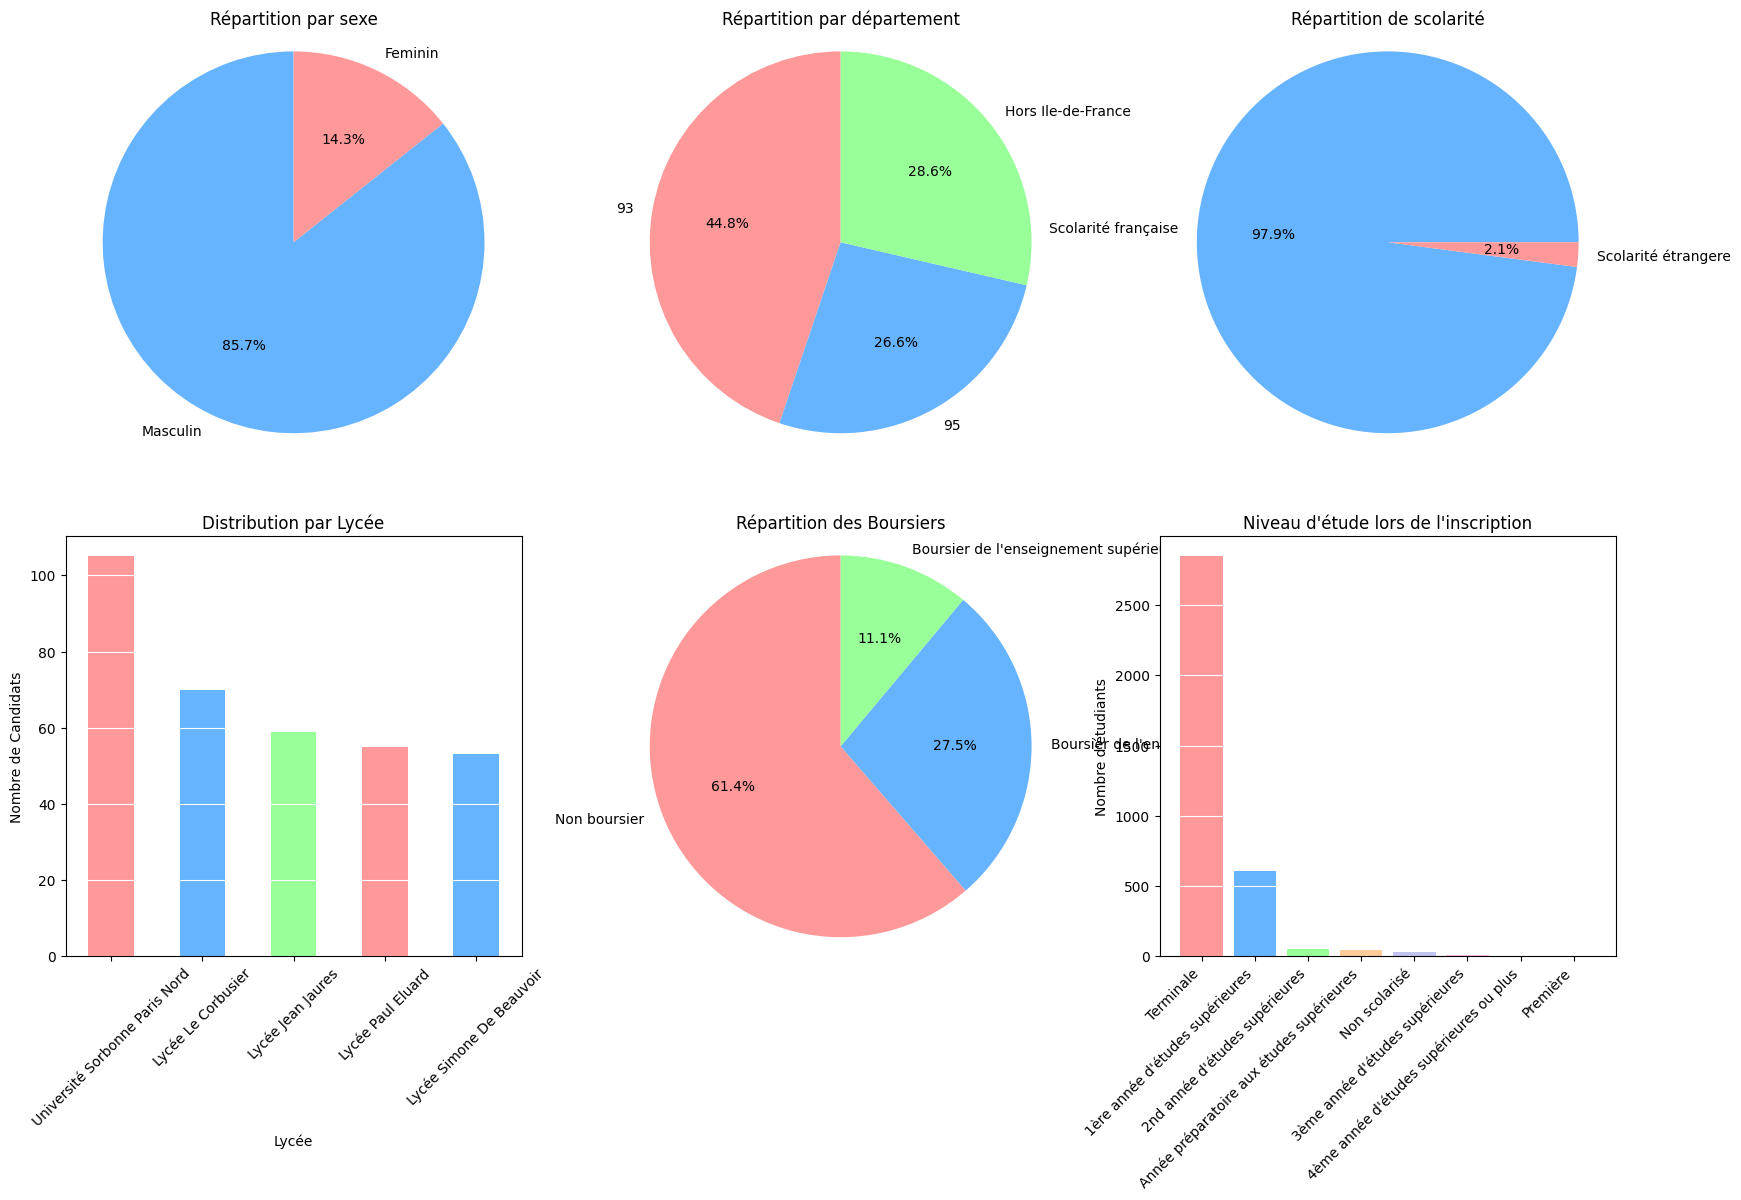

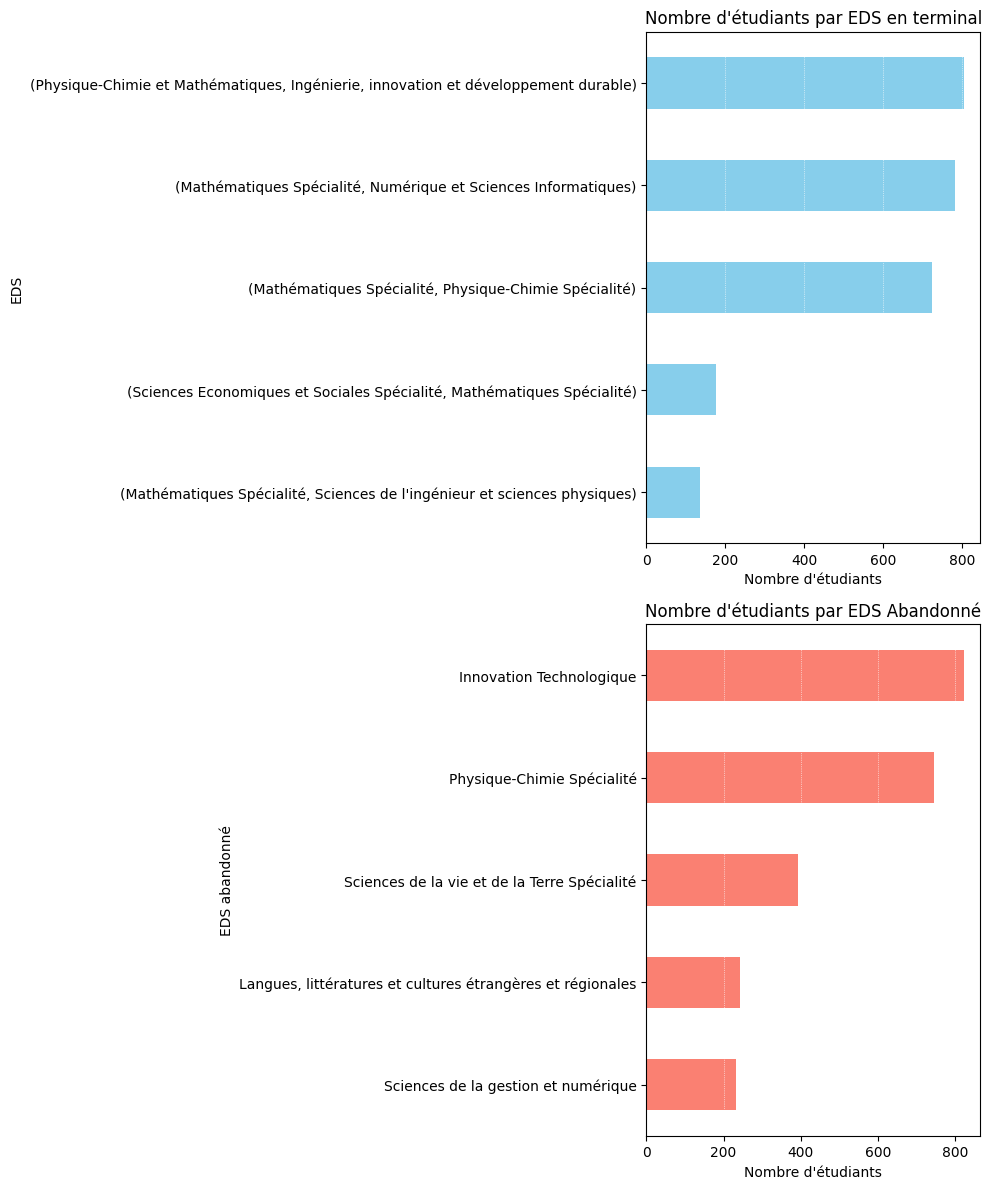

In [112]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Configuration des couleurs
colors_sexes = ['#66b3ff','#ff9999']  # Bleu pour Masculin, Rose pour Feminin
colors_departements = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0','#ffb3e6', '#c4e17f', '#f7c6c7']
colors_boursiers = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0','#ffb3e6', '#c4e17f', '#f7c6c7']

col_commune = 'Commune Etablissement origine - CodePostal 2022/2023'
df_93=(len(df_comm_93[col_commune]))
df_95=(len(df_comm_95[col_commune]))
df_idf=(len(df_hors_idf))
data_departement = {'Catégories': ['93','95','Hors Ile-de-France'],
        'Valeurs': [df_93,df_95,df_idf]}
df_departement = pd.DataFrame(data_departement)
# Création de DataFrames de démonstration
data_s = {'Catégories': ['Masculin', 'Feminin'], 'Valeurs': [homme, femme]}
df_sexe = pd.DataFrame(data_s)
# Configuration de la figure et des sous-graphiques
fig, axs = plt.subplots(2, 3, figsize=(20, 12))  # 3 lignes, 3 colonnes

# Premier graphique - Diagramme circulaire pour les sexes
axs[0, 0].pie(df_sexe['Valeurs'], labels=df_sexe['Catégories'], autopct='%1.1f%%', startangle=90, colors=colors_sexes)
axs[0, 0].set_title('Répartition par sexe')
axs[0, 0].axis('equal')  # Assure que le pie chart est un cercle

# Deuxième graphique - Diagramme circulaire pour les départements
axs[0, 1].pie(df_departement['Valeurs'], labels=df_departement['Catégories'], autopct='%1.1f%%', startangle=90, colors=colors_departements)
axs[0, 1].set_title('Répartition par département')
axs[0, 1].axis('equal')

# Troisième graphique - Diagramme à barres pour les départements



Lycee_provenance = data_voeu_valide['Nom Etablissement origine 2022/2023'].value_counts().head(5)
occurrences = data_voeu_valide['Type de Scolarité - Libellé 2021/2022'].value_counts()
types = ['Scolarité française', 'Scolarité étrangere']
axs[0,2].pie(occurrences, labels=types, autopct='%1.1f%%', startangle=0, colors=colors_sexes)
axs[0, 2].set_title('Répartition de scolarité')  # Titre du subplot
axs[0, 2].axis('equal')

# Utilisation de l'axe à la position [1, 0] pour le graphique à barres
ax = axs[1, 0]  # Indexation à partir de 0
Lycee_provenance.plot(kind='bar', color=['#ff9999', '#66b3ff', '#99ff99'], ax=ax)
ax.set_title('Distribution par Lycée')
ax.set_xlabel('Lycée')
ax.set_ylabel('Nombre de Candidats')
ax.set_xticklabels(Lycee_provenance.index, rotation=45)
ax.yaxis.grid(True, color="white")

boursier_counts = data_voeu_valide['Candidat boursier - Libellé'].value_counts()
axs[1, 1].pie(boursier_counts, labels=boursier_counts.index, autopct='%1.1f%%', startangle=90, colors=colors_boursiers)
axs[1, 1].set_title('Répartition des Boursiers')
axs[1, 1].axis('equal')
niveau = data_voeu_valide[" Niveau Etude - Libellé 2022/2023"].value_counts()

# Création du diagramme en barres
x = range(len(niveau))
axs[1, 2].bar(x, niveau, color=colors_departements)  # Utilisez 'color' pour changer la couleur si nécessaire
# Ajout des étiquettes sur l'axe x
axs[1, 2].set_xticks(x)
axs[1, 2].set_xticklabels(labels=niveau.index, rotation=45, ha="right")

# Ajout des titres et des étiquettes
axs[1, 2].set_title("Niveau d'étude lors de l'inscription")
axs[1, 2].set_ylabel("Nombre d'étudiants")
axs[1, 2].yaxis.grid(True, color="white")
eds_terminal = data_voeu_valide[["EDS Scolarité Terminale 1 - Libellé", "EDS Scolarité Terminale 2 - Libellé"]].value_counts().head().sort_values(ascending=True)
eds_abandonne = data_voeu_valide["EDS Scolarité Abandonné - Libellé"].value_counts().head().sort_values(ascending=True)

# Créer une figure et un ensemble de subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 12))  # 2 lignes, 1 colonne

# Premier graphique dans axs[0, 0]
eds_terminal.plot(kind='barh', ax=axs[0], color='skyblue')  # Utiliser l'axe spécifié
axs[0].set_title("Nombre d'étudiants par EDS en terminal")  # Titre du premier graphique
axs[0].set_xlabel("Nombre d'étudiants")  # Label de l'axe des X
axs[0].set_ylabel("EDS")  # Label de l'axe des Y
axs[0].grid(True, which='major', axis='x', linestyle=':', linewidth=0.5, color="white")  # Ajouter une grille

# Second graphique dans axs[1, 0]
eds_abandonne.plot(kind='barh', ax=axs[1], color='salmon')  # Utiliser l'axe spécifié
axs[1].set_title("Nombre d'étudiants par EDS Abandonné")  # Titre du second graphique
axs[1].set_xlabel("Nombre d'étudiants")  # Label de l'axe des X
axs[1].set_ylabel("EDS abandonné")  # Label de l'axe des Y
axs[1].grid(True, which='major', axis='x', linestyle=':', linewidth=0.5, color="white")  # Ajouter une grille

plt.tight_layout()  # Ajuste automatiquement les sous-plots pour qu'ils s'inscrivent dans la figure
plt.show()


<h4>Deuxieme partie des graphes, pour la série générale
 : </h4>

- Répartition par sexe
- Répartition par département
- Graphique étranger/ français
- Nombre de candidats par département
- Répartition des Boursiers
- Graphique du niveau d'étude lors de l'inscription

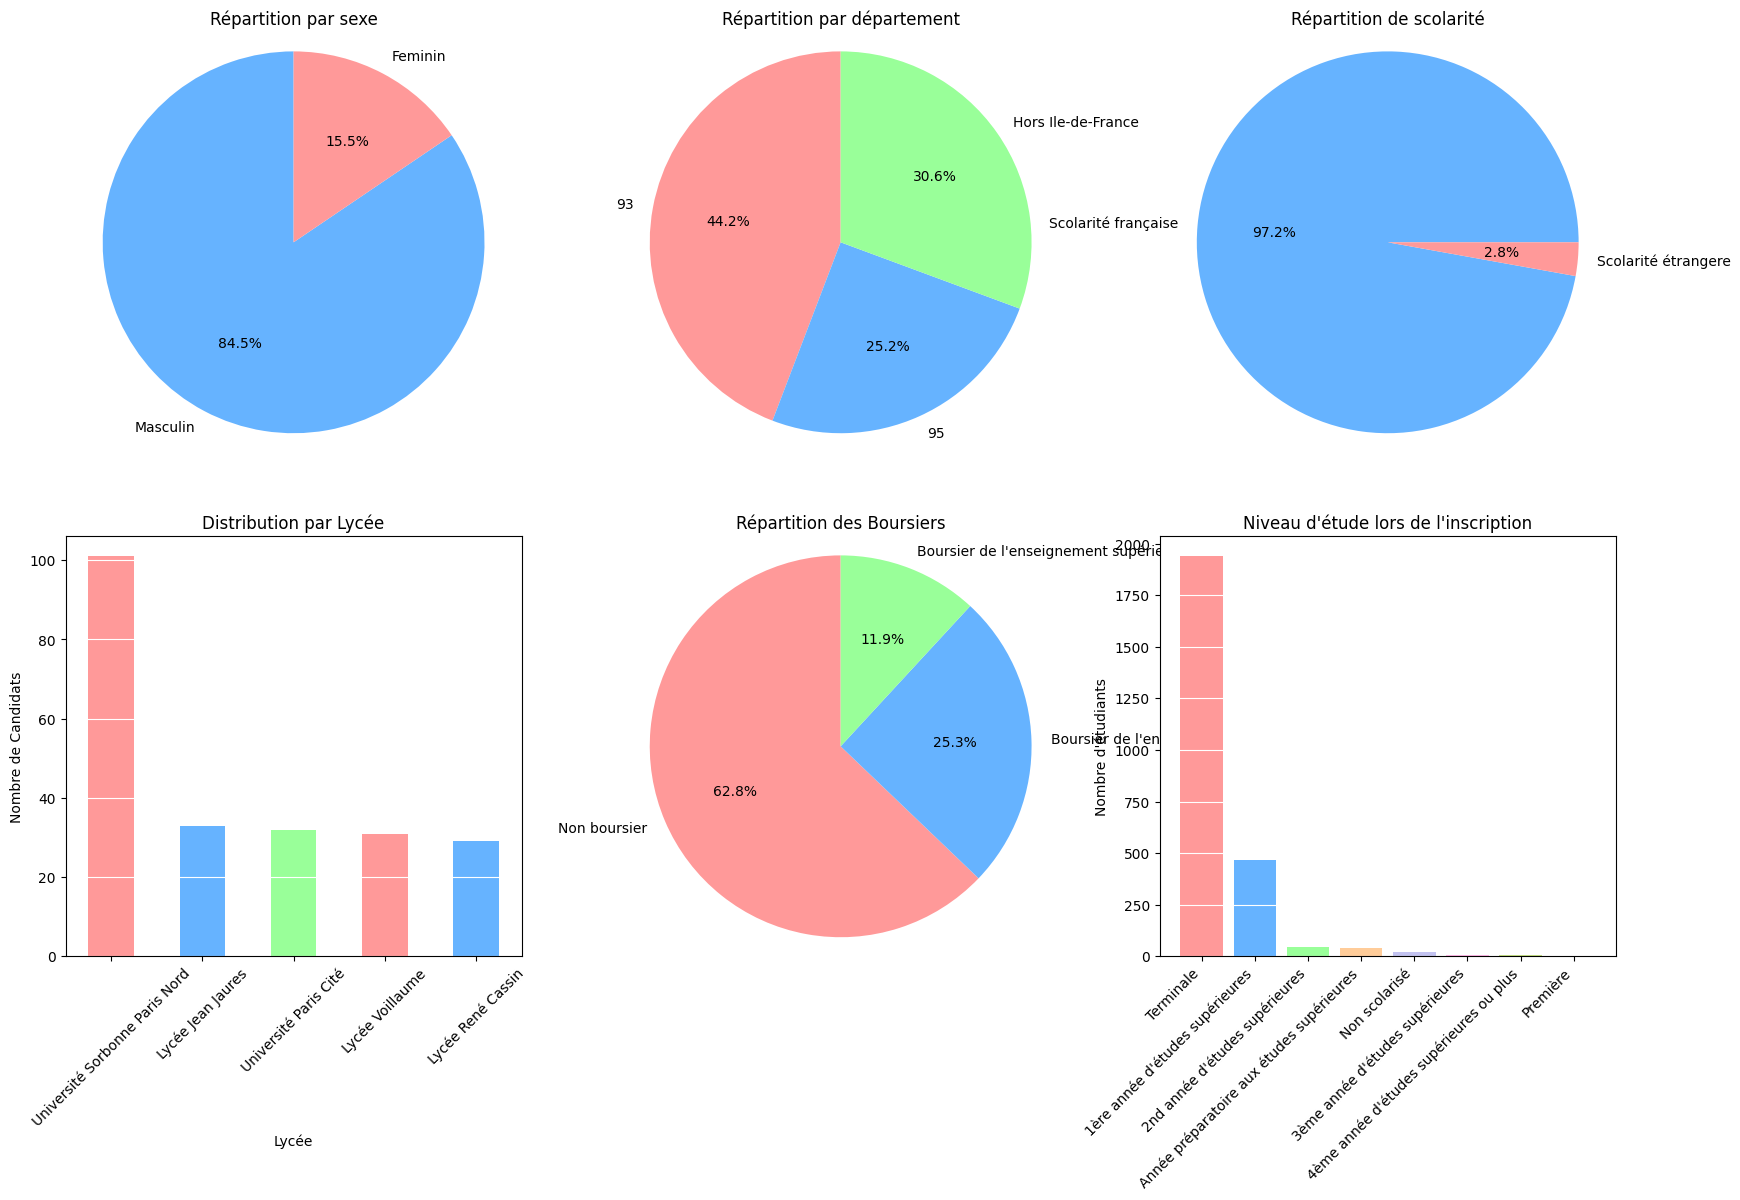

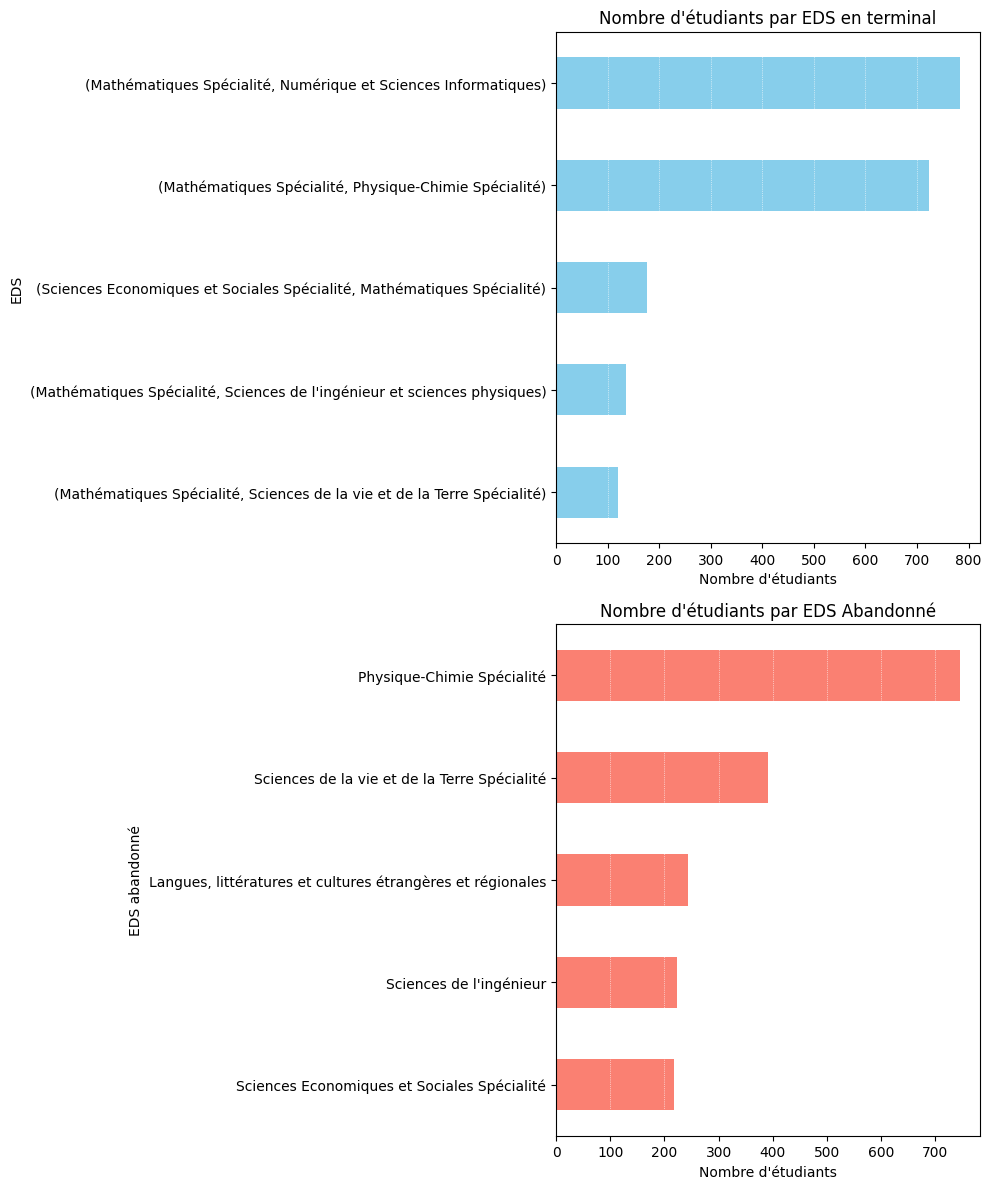

In [113]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Configuration des couleurs
colors_sexes = ['#66b3ff','#ff9999']  # Bleu pour Masculin, Rose pour Feminin
colors_departements = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0','#ffb3e6', '#c4e17f', '#f7c6c7']
colors_boursiers = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0','#ffb3e6', '#c4e17f', '#f7c6c7']
homme=len([ x for x in serie_generaux["Sexe"] if (x == "Masculin") ])
femme=len([ x for x in serie_generaux["Sexe"] if (x == "Féminin") ])
col_commune = 'Commune Etablissement origine - CodePostal 2022/2023'
serie_generaux[col_commune] = serie_generaux[col_commune].fillna('').astype(str)
df_comm_93 = serie_generaux[serie_generaux[col_commune].str.startswith('93')]
df_comm_95 = serie_generaux[serie_generaux[col_commune].str.startswith('95')]
Hors_idf = [item for item in serie_generaux[col_commune] if not (item.startswith(("75", "77", "78", "91", "92", "93", "94", "95")))]
df_hors_idf = pd.DataFrame({'Data': Hors_idf})
df_93=(len(df_comm_93[col_commune]))
df_95=(len(df_comm_95[col_commune]))
df_idf=(len(df_hors_idf))
data_departement = {'Catégories': ['93','95','Hors Ile-de-France'],
        'Valeurs': [df_93,df_95,df_idf]}
df_departement = pd.DataFrame(data_departement)

labels = df_departement['Catégories']
sizes = df_departement['Valeurs']
# Création de DataFrames de démonstration
data_s = {'Catégories': ['Masculin', 'Feminin'], 'Valeurs': [homme, femme]}
# Configuration de la figure et des sous-graphiques
fig, axs = plt.subplots(2, 3, figsize=(20, 12))  # 3 lignes, 3 colonnes

# Premier graphique - Diagramme circulaire pour les sexes
axs[0, 0].pie(data_s['Valeurs'], labels=data_s['Catégories'], autopct='%1.1f%%', startangle=90, colors=colors_sexes)
axs[0, 0].set_title('Répartition par sexe')
axs[0, 0].axis('equal')  # Assure que le pie chart est un cercle

# Deuxième graphique - Diagramme circulaire pour les départements
axs[0, 1].pie(df_departement['Valeurs'], labels=df_departement['Catégories'], autopct='%1.1f%%', startangle=90, colors=colors_departements)
axs[0, 1].set_title('Répartition par département')
axs[0, 1].axis('equal')

# Troisième graphique - Diagramme à barres pour les départements



Lycee_provenance = serie_generaux['Nom Etablissement origine 2022/2023'].value_counts().head(5)
occurrences = serie_generaux['Type de Scolarité - Libellé 2021/2022'].value_counts()
types = ['Scolarité française', 'Scolarité étrangere']
axs[0,2].pie(occurrences, labels=types, autopct='%1.1f%%', startangle=0, colors=colors_sexes)
axs[0, 2].set_title('Répartition de scolarité')  # Titre du subplot
axs[0, 2].axis('equal')

# Utilisation de l'axe à la position [1, 0] pour le graphique à barres
ax = axs[1, 0]  # Indexation à partir de 0
Lycee_provenance.plot(kind='bar', color=['#ff9999', '#66b3ff', '#99ff99'], ax=ax)
ax.set_title('Distribution par Lycée')
ax.set_xlabel('Lycée')
ax.set_ylabel('Nombre de Candidats')
ax.set_xticklabels(Lycee_provenance.index, rotation=45)
ax.yaxis.grid(True, color="white")

boursier_counts = serie_generaux['Candidat boursier - Libellé'].value_counts()
axs[1, 1].pie(boursier_counts, labels=boursier_counts.index, autopct='%1.1f%%', startangle=90,colors=colors_boursiers)
axs[1, 1].set_title('Répartition des Boursiers')
axs[1, 1].axis('equal')
niveau = serie_generaux[" Niveau Etude - Libellé 2022/2023"].value_counts()

# Création du diagramme en barres
x = range(len(niveau))
axs[1, 2].bar(x, niveau, color=colors_departements)  # Utilisez 'color' pour changer la couleur si nécessaire
# Ajout des étiquettes sur l'axe x
axs[1, 2].set_xticks(x)
axs[1, 2].set_xticklabels(labels=niveau.index, rotation=45, ha="right")

# Ajout des titres et des étiquettes
axs[1, 2].set_title("Niveau d'étude lors de l'inscription")
axs[1, 2].set_ylabel("Nombre d'étudiants")
axs[1, 2].yaxis.grid(True, color="white")

eds_terminal = serie_generaux[["EDS Scolarité Terminale 1 - Libellé", "EDS Scolarité Terminale 2 - Libellé"]].value_counts().head().sort_values(ascending=True)
eds_abandonne = serie_generaux["EDS Scolarité Abandonné - Libellé"].value_counts().head().sort_values(ascending=True)

# Créer une figure et un ensemble de subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 12))  # 2 lignes, 1 colonne

# Premier graphique dans axs[0, 0]
eds_terminal.plot(kind='barh', ax=axs[0], color='skyblue')  # Utiliser l'axe spécifié
axs[0].set_title("Nombre d'étudiants par EDS en terminal")  # Titre du premier graphique
axs[0].set_xlabel("Nombre d'étudiants")  # Label de l'axe des X
axs[0].set_ylabel("EDS")  # Label de l'axe des Y
axs[0].grid(True, which='major', axis='x', linestyle=':', linewidth=0.5, color="white")  # Ajouter une grille

# Second graphique dans axs[1, 0]
eds_abandonne.plot(kind='barh', ax=axs[1], color='salmon')  # Utiliser l'axe spécifié
axs[1].set_title("Nombre d'étudiants par EDS Abandonné")  # Titre du second graphique
axs[1].set_xlabel("Nombre d'étudiants")  # Label de l'axe des X
axs[1].set_ylabel("EDS abandonné")  # Label de l'axe des Y
axs[1].grid(True, which='major', axis='x', linestyle=':', linewidth=0.5, color="white")  # Ajouter une grille

plt.tight_layout()  # Ajuste automatiquement les sous-plots pour qu'ils s'inscrivent dans la figure
plt.show()


<h4>Troisieme partie des graphes, pour la série technologiques
 : </h4>

- Répartition par sexe
- Répartition par département
- Graphique étranger/ français
- Nombre de candidats par département
- Répartition des Boursiers
- Graphique du niveau d'étude lors de l'inscription

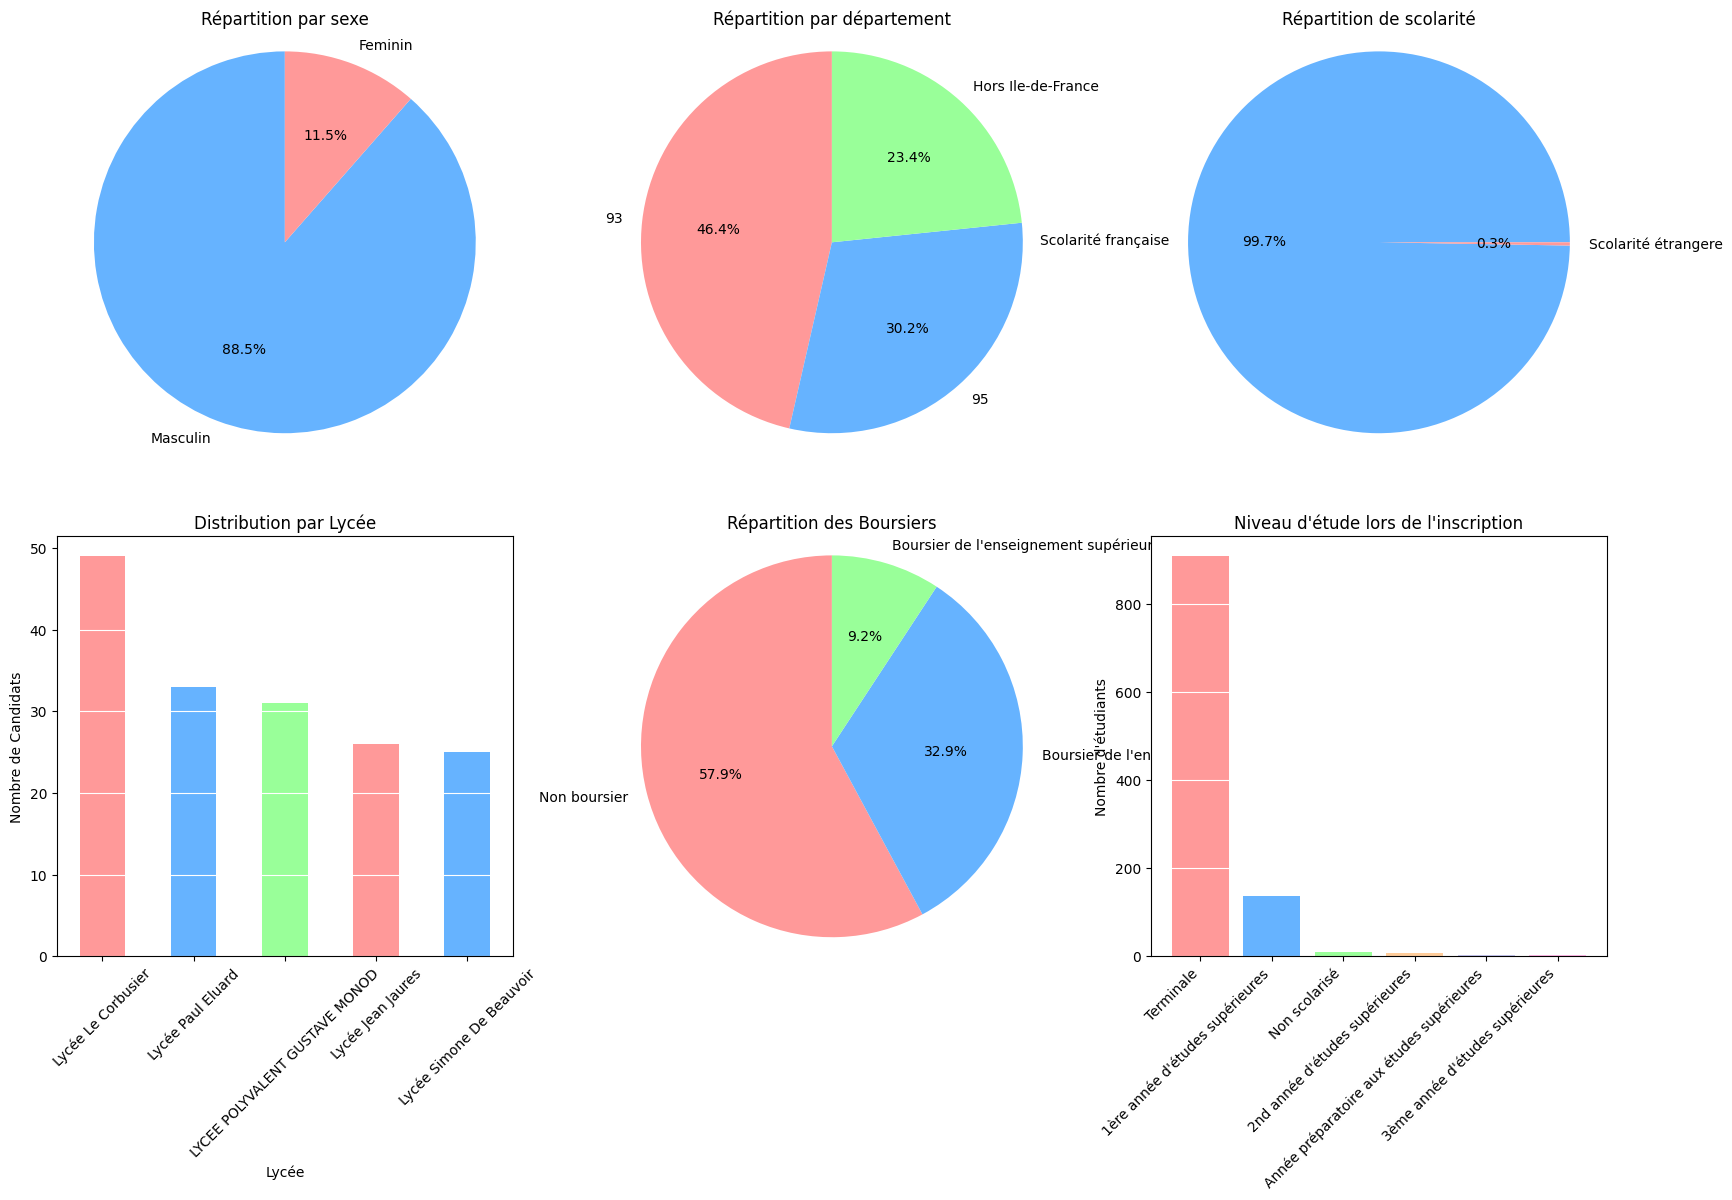

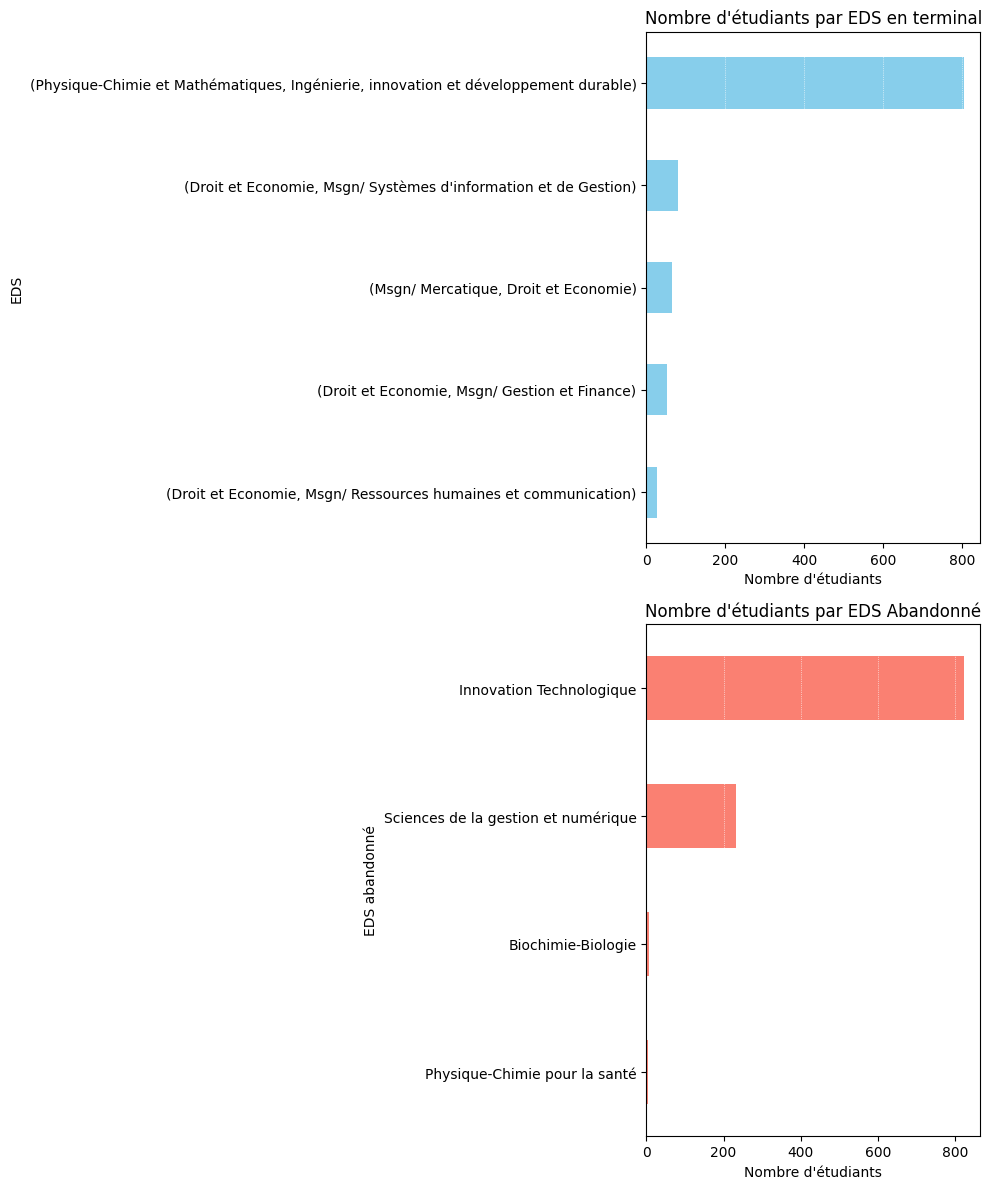

In [114]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Configuration des couleurs
colors_sexes = ['#66b3ff','#ff9999']  # Bleu pour Masculin, Rose pour Feminin
colors_departements = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0','#ffb3e6', '#c4e17f', '#f7c6c7']
colors_boursiers = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0','#ffb3e6', '#c4e17f', '#f7c6c7']
homme=len([ x for x in serie_technologiques["Sexe"] if (x == "Masculin") ])
femme=len([ x for x in serie_technologiques["Sexe"] if (x == "Féminin") ])
col_commune = 'Commune Etablissement origine - CodePostal 2022/2023'
serie_technologiques[col_commune] = serie_technologiques[col_commune].fillna('').astype(str)
df_comm_93 = serie_technologiques[serie_technologiques[col_commune].str.startswith('93')]
df_comm_95 = serie_technologiques[serie_technologiques[col_commune].str.startswith('95')]
Hors_idf = [item for item in serie_technologiques[col_commune] if not (item.startswith(("75", "77", "78", "91", "92", "93", "94", "95")))]
df_hors_idf = pd.DataFrame({'Data': Hors_idf})
df_93=(len(df_comm_93[col_commune]))
df_95=(len(df_comm_95[col_commune]))
df_idf=(len(df_hors_idf))
data_departement = {'Catégories': ['93','95','Hors Ile-de-France'],
        'Valeurs': [df_93,df_95,df_idf]}
df_departement = pd.DataFrame(data_departement)

labels = df_departement['Catégories']
sizes = df_departement['Valeurs']
# Création de DataFrames de démonstration
data_s = {'Catégories': ['Masculin', 'Feminin'], 'Valeurs': [homme, femme]}
# Configuration de la figure et des sous-graphiques
fig, axs = plt.subplots(2, 3, figsize=(20, 12))  # 2 lignes, 3 colonnes

# Premier graphique - Diagramme circulaire pour les sexes
axs[0, 0].pie(data_s['Valeurs'], labels=data_s['Catégories'], autopct='%1.1f%%', startangle=90, colors=colors_sexes)
axs[0, 0].set_title('Répartition par sexe')
axs[0, 0].axis('equal')  # Assure que le pie chart est un cercle

# Deuxième graphique - Diagramme circulaire pour les départements
axs[0, 1].pie(df_departement['Valeurs'], labels=df_departement['Catégories'], autopct='%1.1f%%', startangle=90, colors=colors_departements)
axs[0, 1].set_title('Répartition par département')
axs[0, 1].axis('equal')

# Troisième graphique - Diagramme à barres pour les départements



Lycee_provenance = serie_technologiques['Nom Etablissement origine 2022/2023'].value_counts().head(5)
occurrences = serie_technologiques['Type de Scolarité - Libellé 2021/2022'].value_counts()
types = ['Scolarité française', 'Scolarité étrangere']
axs[0,2].pie(occurrences, labels=types, autopct='%1.1f%%', startangle=0, colors=colors_sexes)
axs[0, 2].set_title('Répartition de scolarité')  # Titre du subplot
axs[0, 2].axis('equal')

# Utilisation de l'axe à la position [1, 0] pour le graphique à barres
ax = axs[1, 0]  # Indexation à partir de 0
Lycee_provenance.plot(kind='bar', color=['#ff9999', '#66b3ff', '#99ff99'], ax=ax)
ax.set_title('Distribution par Lycée')
ax.set_xlabel('Lycée')
ax.set_ylabel('Nombre de Candidats')
ax.set_xticklabels(Lycee_provenance.index, rotation=45)
ax.yaxis.grid(True, color="white")

boursier_counts = serie_technologiques['Candidat boursier - Libellé'].value_counts()
axs[1, 1].pie(boursier_counts, labels=boursier_counts.index, autopct='%1.1f%%', startangle=90,colors=colors_boursiers)
axs[1, 1].set_title('Répartition des Boursiers')
axs[1, 1].axis('equal')
niveau = serie_technologiques[" Niveau Etude - Libellé 2022/2023"].value_counts()
x = range(len(niveau))
# Création du diagramme en barres
axs[1, 2].bar(x, niveau,color=colors_departements)
# Ajout des étiquettes sur l'axe x
axs[1, 2].set_xticks(x)
axs[1, 2].set_xticklabels(labels=niveau.index, rotation=45, ha="right")

# Ajout des titres et des étiquettes
axs[1, 2].set_title("Niveau d'étude lors de l'inscription")
axs[1, 2].set_ylabel("Nombre d'étudiants")
axs[1, 2].yaxis.grid(True, color="white")

eds_terminal = serie_technologiques[["EDS Scolarité Terminale 1 - Libellé", "EDS Scolarité Terminale 2 - Libellé"]].value_counts().head().sort_values(ascending=True)
eds_abandonne = serie_technologiques["EDS Scolarité Abandonné - Libellé"].value_counts().head().sort_values(ascending=True)

# Créer une figure et un ensemble de subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 12))  # 2 lignes, 1 colonne

# Premier graphique dans axs[0, 0]
eds_terminal.plot(kind='barh', ax=axs[0], color='skyblue')  # Utiliser l'axe spécifié
axs[0].set_title("Nombre d'étudiants par EDS en terminal")  # Titre du premier graphique
axs[0].set_xlabel("Nombre d'étudiants")  # Label de l'axe des X
axs[0].set_ylabel("EDS")  # Label de l'axe des Y
axs[0].grid(True, which='major', axis='x', linestyle=':', linewidth=0.5, color="white")  # Ajouter une grille

# Second graphique dans axs[1, 0]
eds_abandonne.plot(kind='barh', ax=axs[1], color='salmon')  # Utiliser l'axe spécifié
axs[1].set_title("Nombre d'étudiants par EDS Abandonné")  # Titre du second graphique
axs[1].set_xlabel("Nombre d'étudiants")  # Label de l'axe des X
axs[1].set_ylabel("EDS abandonné")  # Label de l'axe des Y
axs[1].grid(True, which='major', axis='x', linestyle=':', linewidth=0.5, color="white")  # Ajouter une grille

plt.tight_layout()  # Ajuste automatiquement les sous-plots pour qu'ils s'inscrivent dans la figure
plt.show()


<h2> Question de corrélations et leur graphes :</h2>


Nous allons mettre en corrélation differentes données les uns entre les entre les autres pour pour les afficher sous forme de graphe, le but est de déduire certaines informations suite à ses corrélations effectuées

<h2>- Création d'une Dataframe pour les classés de Série Général</h2>

<h4>- Série général :</h4>

In [115]:
dico_filtré = {k: v for k, v in dico_moyennes.items() if v > 9}
data_classement_sg = data_voeu_valide[data_voeu_valide['ID'].isin(dico_filtré.keys()) ]
print(data_classement_sg)

        ID  Groupe candidat - Code Classement  Aménagement      Sexe  \
7        8                    7415          3          NaN  Masculin   
8        9                    7415        220          NaN  Masculin   
9       10                    7415        577          NaN  Masculin   
15      16                    7415        463          NaN  Masculin   
17      18                    7415        900          NaN  Masculin   
...    ...                     ...        ...          ...       ...   
3231  3232                    7415         12          NaN   Féminin   
3234  3235                    7415         93          NaN  Masculin   
3237  3238                    7415         16          NaN   Féminin   
3239  3240                    7415        415          NaN   Féminin   
3412  3413                    7415         NC          NaN   Féminin   

              Candidat boursier - Libellé Année Scolaire - Libellé 2022/2023  \
7     Boursier de l'enseignement scolaire              

<h4 id="correlation1">- Les genres en fonction des classés Serie Générale</h4>

Text(0.5, 1.0, 'Les genres en fonction des classés')

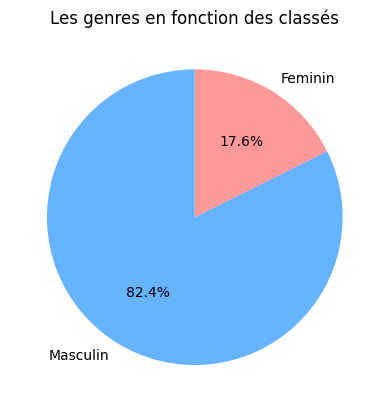

In [116]:
boursiers=data_classement_sg[data_classement_sg["Candidat boursier - Libellé"].str.startswith(("Boursier de l'enseignement supérieur","Boursier de l'enseignement scolaire"))]
homme=len([ x for x in boursiers["Sexe"] if (x == "Masculin") ])
femme=len([ x for x in boursiers["Sexe"] if (x == "Féminin") ])
data_s = {'Catégories': ['Masculin', 'Feminin'], 'Valeurs': [homme, femme]}

plt.pie(data_s['Valeurs'], labels=data_s['Catégories'], autopct='%1.1f%%', startangle=90, colors=colors_sexes)
plt.title('Les genres en fonction des classés')




<h4 id="correlation2">- Les lycées en fonction des classés Serie Générale</h4>


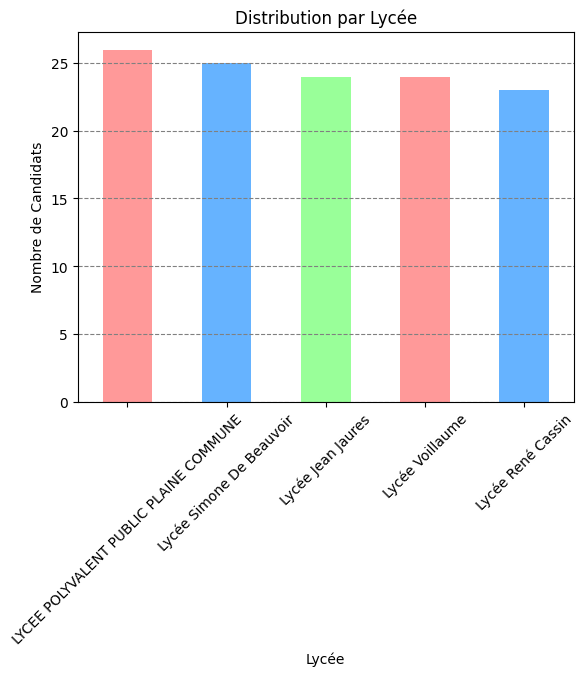

In [117]:
import matplotlib.pyplot as plt


Lycee_classes = data_classement_sg['Nom Etablissement origine 2022/2023'].value_counts().head(5)

# Créer le graphique à barres directement
bars = Lycee_classes.plot(kind='bar', color=['#ff9999', '#66b3ff', '#99ff99'])

# Définir le titre et les étiquettes des axes
plt.title('Distribution par Lycée')
plt.xlabel('Lycée')
plt.ylabel('Nombre de Candidats')

# Ajuster les étiquettes sur l'axe des abscisses
plt.xticks(rotation=45)

# Ajouter une grille sur l'axe des ordonnées
plt.grid(axis='y', linestyle='--', color="gray")

# Afficher le graphique
plt.show()


<h4 id="correlation3">La Répartitions des EDS en fonction des classés Serie Générale</h4>

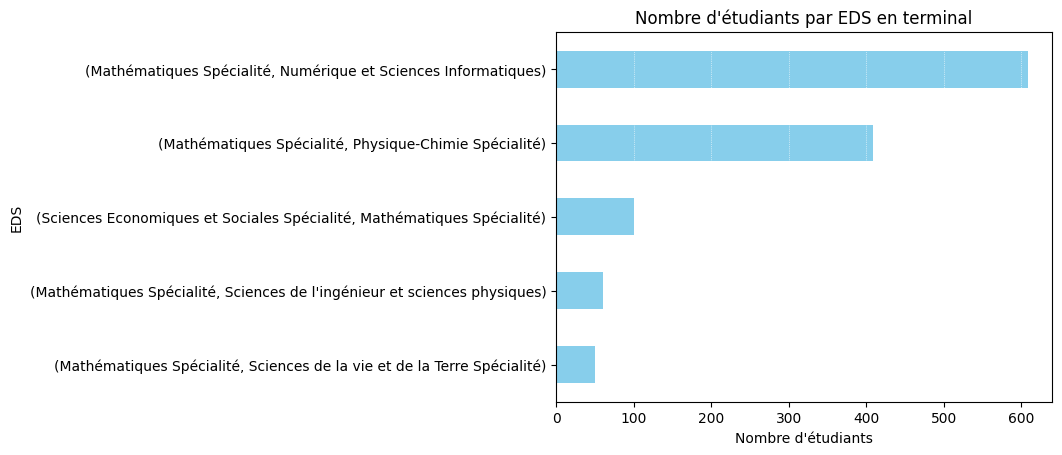

In [118]:
eds_terminal = data_classement_sg[["EDS Scolarité Terminale 1 - Libellé", "EDS Scolarité Terminale 2 - Libellé"]].value_counts().head().sort_values(ascending=True)
eds_terminal.plot(kind='barh', color='skyblue')  # Utiliser l'axe spécifié
plt.title("Nombre d'étudiants par EDS en terminal")  # Titre du premier graphique
plt.xlabel("Nombre d'étudiants")  # Label de l'axe des X
plt.ylabel("EDS")  # Label de l'axe des Y
plt.grid(True, which='major', axis='x', linestyle=':', linewidth=0.5, color="white")  # Ajouter une grille

<h2>- Création d'une Dataframe pour les classés Série Technologique</h2>

In [119]:
data_classement_technos.to_excel('testslim.xlsx', index=False)

In [120]:
dico_filtré2 = {k: v for k, v in dico_moyennes_techno.items() if v > 9}
data_classement_technos = data_voeu_valide[data_voeu_valide['ID'].isin(dico_filtré2.keys()) ]
print(data_classement_technos)

        ID  Groupe candidat - Code Classement  Aménagement      Sexe  \
0        1                  142309         NC          NaN  Masculin   
3        4                  142309         NC          NaN  Masculin   
5        6                  142309        116          NaN   Féminin   
6        7                  142309        318          NaN  Masculin   
10      11                  142309        336          NaN  Masculin   
...    ...                     ...        ...          ...       ...   
3147  3148                  142309         NC          NaN  Masculin   
3148  3149                  142309        243          NaN  Masculin   
3150  3151                  142309        301          NaN  Masculin   
3151  3152                  142309         NC          NaN  Masculin   
3179  3180                  142309         NC          NaN  Masculin   

              Candidat boursier - Libellé Année Scolaire - Libellé 2022/2023  \
0                            Non boursier              

<h4>- Série Technologique :</h4>

<h4 id="correlation1">- Les genres en fonction des classés Serie technologique</h4>

Text(0.5, 1.0, 'Les genres en fonction des classés')

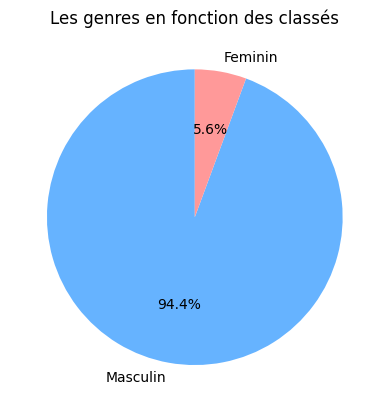

In [121]:
boursiers=data_classement_technos[data_classement_technos["Candidat boursier - Libellé"].str.startswith(("Boursier de l'enseignement supérieur","Boursier de l'enseignement scolaire"))]
homme=len([ x for x in boursiers["Sexe"] if (x == "Masculin") ])
femme=len([ x for x in boursiers["Sexe"] if (x == "Féminin") ])
data_s = {'Catégories': ['Masculin', 'Feminin'], 'Valeurs': [homme, femme]}

plt.pie(data_s['Valeurs'], labels=data_s['Catégories'], autopct='%1.1f%%', startangle=90, colors=colors_sexes)
plt.title('Les genres en fonction des classés')


<h4 id="correlation1">- Les Lycées en fonction des classés Serie Technologique</h4>

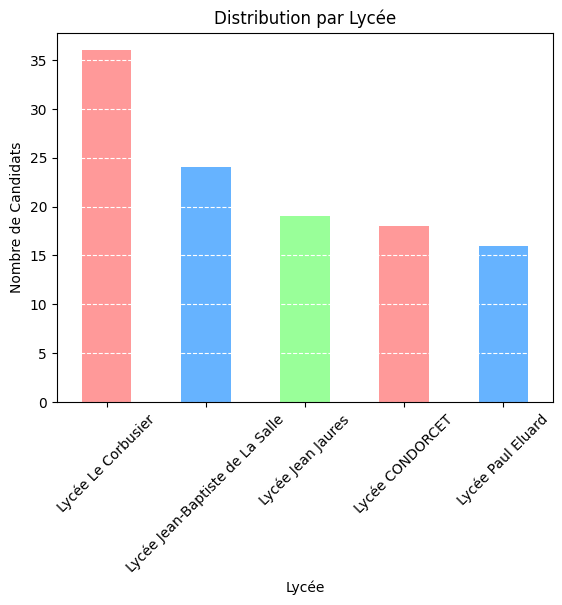

In [122]:
Lycee_classes = data_classement_technos['Nom Etablissement origine 2022/2023'].value_counts().head(5)

# Créer le graphique à barres directement
bars = Lycee_classes.plot(kind='bar', color=['#ff9999', '#66b3ff', '#99ff99'])

# Définir le titre et les étiquettes des axes
plt.title('Distribution par Lycée')
plt.xlabel('Lycée')
plt.ylabel('Nombre de Candidats')

# Ajuster les étiquettes sur l'axe des abscisses
plt.xticks(rotation=45)

# Ajouter une grille sur l'axe des ordonnées
plt.grid(axis='y', linestyle='--', color="white")

# Afficher le graphique
plt.show()

<h4 id="correlation3">La Répartitions des EDS en fonction des classés Serie Technologique</h4>

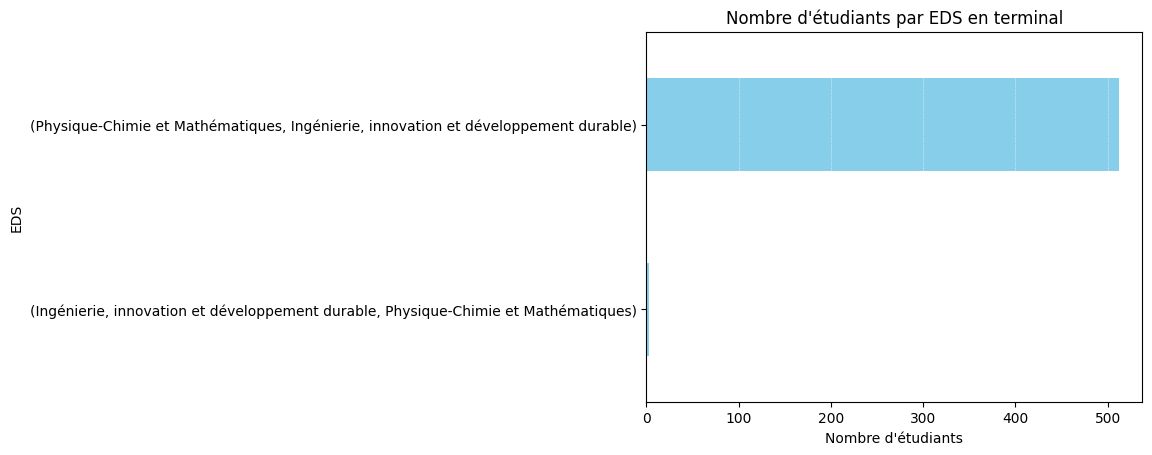

In [123]:
eds_terminal = data_classement_technos[["EDS Scolarité Terminale 1 - Libellé", "EDS Scolarité Terminale 2 - Libellé"]].value_counts().head().sort_values(ascending=True)
eds_terminal.plot(kind='barh', color='skyblue')  # Utiliser l'axe spécifié
plt.title("Nombre d'étudiants par EDS en terminal")  # Titre du premier graphique
plt.xlabel("Nombre d'étudiants")  # Label de l'axe des X
plt.ylabel("EDS")  # Label de l'axe des Y
plt.grid(True, which='major', axis='x', linestyle=':', linewidth=0.5, color="white")  # Ajouter une grille

<h2 id="general">Classement : Général</h2>

In [124]:
classement = dict(sorted(dico_moyennes.items(), key=lambda item: item[1], reverse=True))
i=1
for cle, valeur in classement.items():
    if valeur > 9:
        print(f"Étudiant numéro : {cle}, Moyenne: {valeur:.2f}, Classé: {i}" )
        i+=1

Étudiant numéro : 3062, Moyenne: 18.45, Classé: 1
Étudiant numéro : 3061, Moyenne: 18.07, Classé: 2
Étudiant numéro : 8, Moyenne: 17.92, Classé: 3
Étudiant numéro : 2496, Moyenne: 17.63, Classé: 4
Étudiant numéro : 2203, Moyenne: 17.12, Classé: 5
Étudiant numéro : 2966, Moyenne: 17.10, Classé: 6
Étudiant numéro : 1570, Moyenne: 16.93, Classé: 7
Étudiant numéro : 2753, Moyenne: 16.88, Classé: 8
Étudiant numéro : 609, Moyenne: 16.87, Classé: 9
Étudiant numéro : 957, Moyenne: 16.81, Classé: 10
Étudiant numéro : 2408, Moyenne: 16.81, Classé: 11
Étudiant numéro : 2545, Moyenne: 16.77, Classé: 12
Étudiant numéro : 319, Moyenne: 16.74, Classé: 13
Étudiant numéro : 1169, Moyenne: 16.73, Classé: 14
Étudiant numéro : 1085, Moyenne: 16.72, Classé: 15
Étudiant numéro : 301, Moyenne: 16.66, Classé: 16
Étudiant numéro : 240, Moyenne: 16.57, Classé: 17
Étudiant numéro : 1035, Moyenne: 16.56, Classé: 18
Étudiant numéro : 588, Moyenne: 16.52, Classé: 19
Étudiant numéro : 2856, Moyenne: 16.35, Classé: 2

<h2 id="technologique">Classement : Technologique</h2>

In [125]:
classement = dict(sorted(dico_moyennes_techno.items(), key=lambda item: item[1], reverse=True))
i=1
for cle, valeur in classement.items():
    if valeur > 9:
        print(f"Étudiant numéro : {cle}, Moyenne: {valeur:.2f}, Classé: {i}" )
        i+=1

Étudiant numéro : 1922, Moyenne: 17.57, Classé: 1
Étudiant numéro : 333, Moyenne: 17.52, Classé: 2
Étudiant numéro : 2245, Moyenne: 17.12, Classé: 3
Étudiant numéro : 2058, Moyenne: 16.53, Classé: 4
Étudiant numéro : 161, Moyenne: 16.35, Classé: 5
Étudiant numéro : 1010, Moyenne: 16.34, Classé: 6
Étudiant numéro : 2066, Moyenne: 16.23, Classé: 7
Étudiant numéro : 67, Moyenne: 16.20, Classé: 8
Étudiant numéro : 1374, Moyenne: 16.08, Classé: 9
Étudiant numéro : 3012, Moyenne: 16.01, Classé: 10
Étudiant numéro : 1167, Moyenne: 15.84, Classé: 11
Étudiant numéro : 2879, Moyenne: 15.69, Classé: 12
Étudiant numéro : 2675, Moyenne: 15.68, Classé: 13
Étudiant numéro : 1519, Moyenne: 15.67, Classé: 14
Étudiant numéro : 336, Moyenne: 15.66, Classé: 15
Étudiant numéro : 1189, Moyenne: 15.62, Classé: 16
Étudiant numéro : 460, Moyenne: 15.58, Classé: 17
Étudiant numéro : 1396, Moyenne: 15.53, Classé: 18
Étudiant numéro : 2061, Moyenne: 15.44, Classé: 19
Étudiant numéro : 17, Moyenne: 15.42, Classé: 